# Credit Card Predictions

Antonio Debouse, Blake Freeman, Bodie Franklin, Eric Romero


# Summary of Resubmission Changes:


<span style='background:yellow'> 
Added to new resubmission:
</span>

* Data Meaning Type formatted into table
* df.info() added and data encoding discussed
* Missing values analysis and visual
* Duplicate check analysis
* Simple stats section label added
   

* Needed:
   * Analysis or code check sections addressing outliers - Blake
   * Analysis for all charts - Everyone do their own chart
   * Box plots reduced or faceted - Blake
   * Reassess simple stats section - Antonio
   * Visualize more attributes not related to classification - Eric
   * New features re-assessed and explained - Blake


# Business Understanding

Credit card companies are always in search of better ways to monitor borrowers to determine if the credit card borrower will default on their credit card payments or make them in full. Defaulted credit card payments are often difficult to recoup and create losses for these companies. Defaulting on a payment is defined as not meeting the debt obligation (which is the credit card payment). Our dataset is composed of 24 attributes and 30,000 records that reflect a Taiwanese credit card borrower’s payment history over a six month period.The data was pulled from UCI machine learning repository. The purpose of the dataset is to provide attributes at different points in their payment history to identify if a credit card borrower will default on their payments or pay in full. Since the dataset captures six payment periods, it gives the credit card firm a chance to identify if default will occur or not in various billing cycles.  The effectiveness of a good classification algorithm is one that produces strong accuracy, sensitivity, and specificity scores through cross validation. If an effective classification model can be built, the credit company will have the ability to proactively monitor borrowers in various credit stages.
The significance of identifying default or not will allow the credit card to minimize their losses. If early default identification occurs, the credit card company can reduce the borrower’s credit limits or preemptively work with the borrower to create new repayment plans. Both outcomes will help the credit company reduce their losses that would occur if no action were taken.  


# Data Meaning Type

In [3]:
#Imports 
import pandas as pd
#import plotly as py #gives error?
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<span style='background:yellow'> 
Data Meaning Types Chart Reformatted into Table:
</span>

In [30]:
DataMeaningType = pd.DataFrame(
{'Attribute': ['Amount of the given credit (NT dollar):', 'Gender:', 'Education:','Marital status:','Age:','PAY_0 to PAY6:','BILL_AMT1 to BILL_AMT6:','PAY_AMT1 to PAY_AMT6:','Default payment next month:'],
'Data Type ': ['Nomminal scale', 'Categorical', 'Ordinal scale','Categorical scale','Numerical/Nomminal','Categorical scale','Nominal scale','Nominal scale','Categorical scale'],
'Description': ['Combined total of credit (amount of money) given to the individual borrower and their family.', '1 represents male and 2 represents female.', '1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others. Values 0,5,6 are undefined.','1 = married, 2 = single, 3 = others. Value 0 is undefined.','Measures how old a borrower is.','Categorical scale','These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.','This value represents the amount of the credit card bill paid in each respective month','1 represents a default or missed payment. 0 represents payment made.']})
pd.set_option("max_colwidth", 3000)

DataMeaningType 

Attribute          Data Type                                                                                                                                                                                                                                                                                                                                                                   Description
0  Amount of the given credit (NT dollar):      Nomminal scale                                                                                                                                                                                                                                                                                Combined total of credit (amount of money) given to the individual borrower and their family.
1                                  Gender:         Categorical                                                                                                                                                                                                                                                                                                                                   1 represents male and 2 represents female.
2                               Education:       Ordinal scale                                                                                                                                                                                                      1 represents the highest level of education and 4 would be the lowest. 1 = graduate school, 2 = university, 3 = high school and 4 = others. Values 0,5,6 are undefined.
3                          Marital status:   Categorical scale                                                                                                                                                                                                                                                                                                                   1 = married, 2 = single, 3 = others. Value 0 is undefined.
4                                     Age:  Numerical/Nomminal                                                                                                                                                                                                                                                                                                                                              Measures how old a borrower is.
5                           PAY_0 to PAY6:   Categorical scale                                                                                                                                                                                                                                                                                                                                                            Categorical scale
6                  BILL_AMT1 to BILL_AMT6:       Nominal scale  These attributes describe the past monthly payment status of each made. For example, PAY_0 represents the payment status in September 2005 and PAY_6 represents the payment status in April 2005. -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
7                    PAY_AMT1 to PAY_AMT6:       Nominal scale                                                                                                                                                                                                                                                                                       This value represents the amount of the credit card bill paid in each respective month
8              Default payment next month:   Categorical scale                                                                                                                       

In [4]:
# import and reading of the Data set
bank_db_df = pd.read_csv("Data/bank_dataset.csv") # read in the csv file

In [5]:
#Data description
bank_db_df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [6]:
bank_db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<span style='background :yellow' >
All categorical variables in the dataset were already in integer format. Therefore, no encoding or transformation was needed.
</span>


# Data Quality 

The data that was pulled was fairly clean to start when reviewing this data. However we did notice some factors that were not in the defined range of the data. This was apparent in categorical columns of Education and Marriage. Education had 3 additional values of 0, 5, 6  which occurred 345 times out of the 30,000 values in this column. Marriage had a value of 0 which occurred 54 times out of the 30,000 values. We addressed both these mistakes in the data by adding them to the “other” column that is denoted in each category. We decided to include these variables since it looked like a misclassification of the data type. 

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

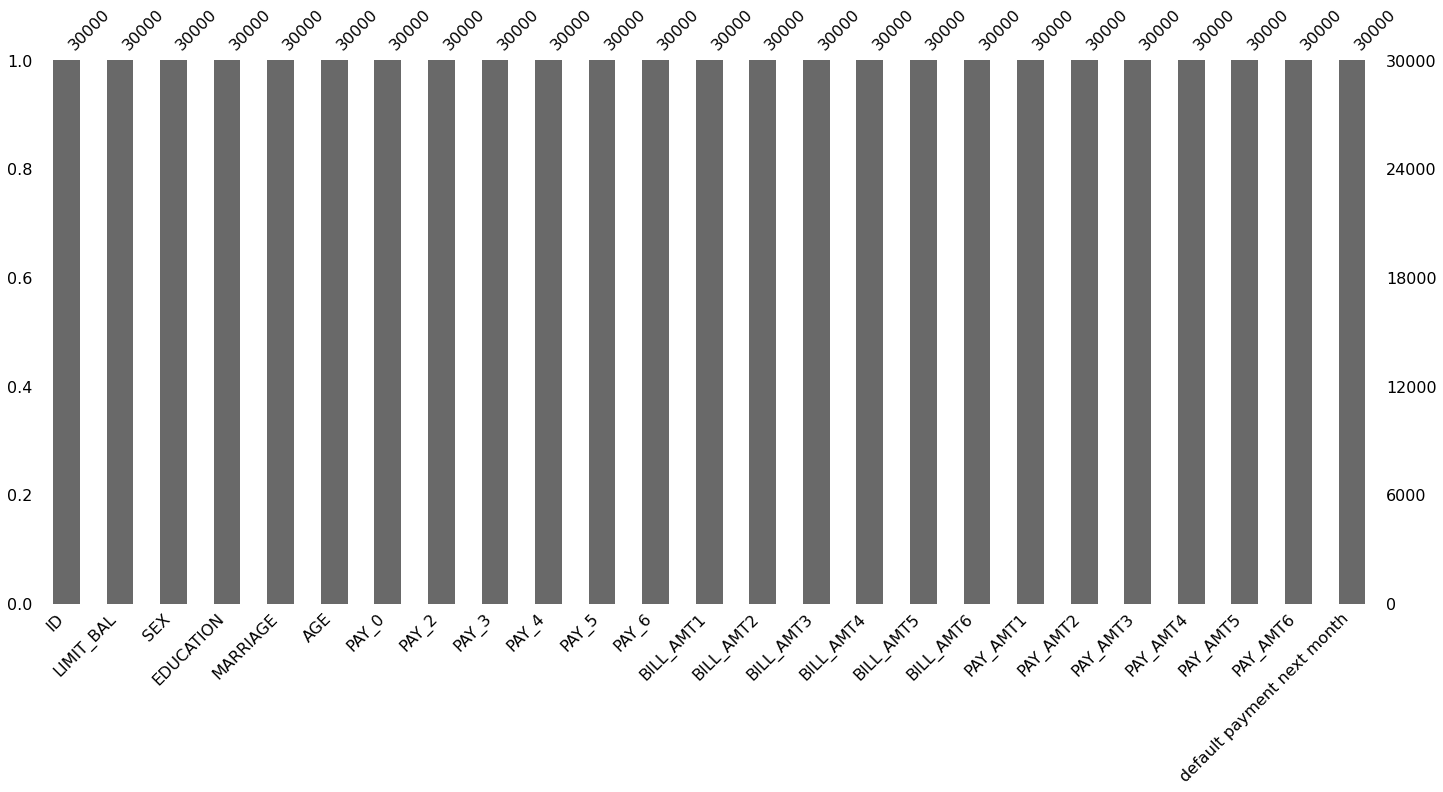

In [14]:
import pandas as pd 
import missingno as msno
msno.bar(bank_db_df)

# First look at the Data Set 
bank_db_df.head()

<span style='background:yellow'>
Based on the above chart there are no missing values for any attribute in the data set.
</span>

In [18]:
bank_db_df['EDUCATION'].value_counts(normalize=True)
bank_db_df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

<span style='background:yellow'>
However with further analysis we see that the attributes for Education and Marriage have undefined values based on the data dictionary provided potentially meaning these records are incomplete/missing. For example, Marriage has recorded values of zero even though only values of 1-3 are defined. Therefore the undefined data may be removed to avoid affecting our classifications.
</span>

### Check for Duplicates

In [15]:
dup_check = bank_db_df[bank_db_df.duplicated()]
dup_check

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

<span style='background:yellow'>
There was no duplicate rows in our orginal data set based on the duplicate function check performed above.
</span>

### Outliers

In [ ]:
###

In [7]:
# Noted below on the catagorical variables UCI stated

In [8]:
# Gender (1 = male; 2 = female) 
Gender = bank_db_df.groupby('SEX')['ID'].nunique()
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
EDUCATION = bank_db_df.groupby('EDUCATION')['ID'].nunique()
# Marital status (1 = married; 2 = single; 3 = others)
MARRIAGE = bank_db_df.groupby('MARRIAGE')['ID'].nunique()
print(Gender)
print(EDUCATION)
print(MARRIAGE)

#based on this documentaion there are addtional variables in Education and Marital Status

### purposed code from Stack Overflow for this.

SEX
1    11888
2    18112
Name: ID, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: ID, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: ID, dtype: int64


In [9]:
#Group by balances
df_grouped = bank_db_df.groupby(by='default payment next month')
print(df_grouped.BILL_AMT1.mean())
print('--------')
print(df_grouped.BILL_AMT2.mean())
print('--------')
print(df_grouped.BILL_AMT3.mean())
print('--------')
print(df_grouped.BILL_AMT4.mean())
print('--------')
print(df_grouped.BILL_AMT5.mean())
print('--------')
print(df_grouped.BILL_AMT6.mean())
print('----------------------')
print(df_grouped.PAY_AMT1.mean())
print('--------')
print(df_grouped.PAY_AMT2.mean())
print('--------')
print(df_grouped.PAY_AMT3.mean())
print('--------')
print(df_grouped.PAY_AMT4.mean())
print('--------')
print(df_grouped.PAY_AMT5.mean())
print('--------')
print(df_grouped.PAY_AMT6.mean())

#Interesting that the mean pmts made/due are lower than people who defaulted.

default payment next month
0    51994.227273
1    48509.162297
Name: BILL_AMT1, dtype: float64
--------
default payment next month
0    49717.435670
1    47283.617842
Name: BILL_AMT2, dtype: float64
--------
default payment next month
0    47533.365605
1    45181.598855
Name: BILL_AMT3, dtype: float64
--------
default payment next month
0    43611.165254
1    42036.950573
Name: BILL_AMT4, dtype: float64
--------
default payment next month
0    40530.445343
1    39540.190476
Name: BILL_AMT5, dtype: float64
--------
default payment next month
0    39042.268704
1    38271.435503
Name: BILL_AMT6, dtype: float64
----------------------
default payment next month
0    6307.337357
1    3397.044153
Name: PAY_AMT1, dtype: float64
--------
default payment next month
0    6640.465074
1    3388.649638
Name: PAY_AMT2, dtype: float64
--------
default payment next month
0    5753.496833
1    3367.351567
Name: PAY_AMT3, dtype: float64
--------
default payment next month
0    5300.529319
1    3155.62673

In [10]:
# Group-By for the data by the Catagorical Variables - Noticed there were groups that were not defined by the data set  
bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).mean()

ID      LIMIT_BAL        AGE     PAY_0  \
SEX EDUCATION MARRIAGE                                                     
1   0         1         27213.500000  205000.000000  41.000000 -1.500000   
              2         14308.000000  215000.000000  36.500000  0.000000   
    1         0         24444.000000  300000.000000  37.000000 -1.000000   
              1         14549.651479  262485.207101  42.423077 -0.220118   
              2         14363.201671  192085.074060  31.704899 -0.147360   
              3         11595.233333  165333.333333  44.533333 -0.033333   
    2         0         24722.000000  360000.000000  38.000000 -1.000000   
              1         15296.578903  162101.265823  40.332489  0.115612   
              2         14656.010204  112442.176871  31.584354  0.272789   
              3         15215.031746   70952.380952  40.698413  0.142857   
    3         0         11619.916667   96666.666667  38.000000  0.250000   
              1         14847.441794  140143.129771  44.338740  0.189885   
              2         15117.636465  100847.516779  35.379195  0.268456   
              3         13351.583333   69166.666667  47.722222  0.361111   
    4         1         17826.722222  230000.000000  41.777778 -0.222222   
              2         17408.521739  173478.260870  28.173913 -0.478261   
              3         23938.000000  150000.000000  27.000000 -1.000000   
    5         1         20020.500000  209916.666667  39.354167 -0.208333   
              2         18037.065217  107608.695652  32.630435  0.282609   
              3         27406.000000  100000.000000  44.000000  2.000000   
    6         1         19884.500000  165714.285714  48.000000 -0.714286   
              2         17602.545455  146363.636364  40.363636 -0.090909   
2   0         1         21578.000000  135000.000000  37.500000 -1.000000   
              2         13962.000000  267500.000000  42.000000 -0.500000   
    1         0         13005.000000  160000.000000  36.333333 -1.000000   
              1         15033.563976  245319.881890  38.870571 -0.360236   
              2         14823.686063  190821.360153  30.158046 -0.234195   
              3         14976.950000  184000.000000  38.150000 -0.050000   
    2         0         13161.800000  166000.000000  35.800000  0.000000   
              1         15272.627013  164180.679785  37.527504  0.016324   
              2         14888.093137  146840.686275  30.405637  0.062500   
              3         13705.131313   96363.636364  40.868687  0.222222   
    3         0         17418.250000  126562.500000  38.218750 -0.218750   
              1         15914.895201  129387.755102  42.356315  0.076117   
              2         15262.420690  135674.876847  36.240394  0.054187   
              3         12542.238806   78059.701493  46.059701  0.179104   
    4         1         18767.176471  247941.176471  37.941176 -0.823529   
              2         17766.622222  222000.000000  30.355556 -0.400000   
              3         24423.500000  235000.000000  40.500000  0.000000   
    5         1         16835.029412  185784.313725  37.725490 -0.235294   
              2         16274.679012  157901.234568  32.234568 -0.185185   
              3         15354.500000  110000.000000  37.500000  0.000000   
    6         1         16326.214286  153571.428571  45.000000 -0.071429   
              2         13957.400000  111000.000000  40.900000  0.300000   
              3         10747.000000  185000.000000  42.000000  0.000000   

                           PAY_2     PAY_3     PAY_4     PAY_5     PAY_6  \
SEX EDUCATION MARRIAGE                                                     
1   0         1        -1.500000 -1.500000 -1.500000 -1.000000 -1.500000   
              2        -0.833333 -1.166667 -1.000000 -1.166667 -1.666667   
    1         0        -1.000000 -1.000000 -1.000000  0.000000  0.000000   
              1        -0.418935 -0.459763 -0.495266 -0.521893 -0.528402   
     

### Cleaning the Data

In [11]:
# Cleaning the Data on Unrepresented Variables
#Since both Education and Marrage have a others catagory we decided to include the vaules to in the other catagory since 
# We can not state the meaning of these.

bank_db_df['EDUCATION'] = bank_db_df['EDUCATION'].replace([0,5,6],4)


bank_db_df['MARRIAGE'] = bank_db_df['MARRIAGE'].replace([0],3)

#bank_db_df.EDUCATION.unique()
#bank_db_df.MARRIAGE.unique()

# Simple Statistics


<span style='background:yellow'> 
This section was previously unlabeled therefore should all be highlighted
</span>

In [13]:
#Calculate % accounts that Defaulted (Default=1)
len(bank_db_df[bank_db_df["default payment next month"]==1])/len(bank_db_df)*100

22.12

In [14]:
#Create dataset with only default accounts
Default_accts = bank_db_df[bank_db_df['default payment next month']==1]

#Create dataset for Non-Default accounts
NonD_accts = bank_db_df[bank_db_df['default payment next month']==0]

#Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb.

In [17]:
#Aggregate Default column by Categorical Variables (SEX,EDUCATION,MARRIAGE)
Cat_group = Default_accts.groupby(by=['SEX','EDUCATION','MARRIAGE'])

print ('Total in Group who Defaulted:')
print (Cat_group["default payment next month"].count())
print ('---------------------------------------------------')
print ('Percentage of the Group who Defaulted:')
print (round((Cat_group["default payment next month"].sum()/bank_db_df["default payment next month"].count()*100),3)) #group percentage of total default amount which equals 22.12

#Citation: Drew, Jake M. “Jakemdrew/DataMiningNotebooks.” GitHub, 11 Aug. 2011, github.com/jakemdrew/DataMiningNotebooks/blob/master/02.%20DataVisualization.ipynb.

Total in Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1            390
                2            506
                3             10
     2          1            643
                2            746
                3             19
     3          1            303
                2            229
                3             13
     4          1             10
                2              4
2    1          1            379
                2            748
                3              3
     2          1           1023
                2            873
                3             26
     3          1            451
                2            223
                3             18
     4          1              7
                2             12
Name: default payment next month, dtype: int64
---------------------------------------------------
Percentage of the Group who Defaulted:
SEX  EDUCATION  MARRIAGE
1    1          1           1.300
                2     

<span style='background:yellow'> 
Of all the accounts in the dataset, 22.12% defaulted (6636 total accounts). The 3.41% of married females with a university eductation who defaulted makes up the largest percentage of the defaulted group at 15.42%, while single females with a university are the second highest group to default(2.91%) accounting for 13.15% of the defaults, followed by the single female with a graduate school education default rate of 2.49% to account for 11.26% of total defaults.
The 0.013% of the single males with an "other" education group that defaulted makes up the smallest portion of the defaulted group at 5.877e-4%, second is the married females with an "other" education group who default rate is 0.023%, followed by a tie for the third lowest default rate at 0.033% between graduated educated males with an "other" martial status and married males with an "other" education.
</span>

In [18]:
#Create summary statistics
df_sub = bank_db_df[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subd = Default_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]
df_subnond = NonD_accts[['SEX','EDUCATION','MARRIAGE','AGE','LIMIT_BAL']]

print (round(df_sub.describe(),2))
print ('Median values for AGE and LIMIT_BAL')
print (df_sub.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Defaulted accounts')
print (round(df_subd.describe()),2)
print ('Median values')
print (df_subd.median())
print('------------------------------------------------------')
print('AGE and Limit Balance on Non-Defaulted accounts')
print (round(df_subnond.describe(),2))
print (df_subnond.median())

            SEX  EDUCATION  MARRIAGE       AGE   LIMIT_BAL
count  30000.00   30000.00  30000.00  30000.00    30000.00
mean       1.60       1.84      1.56     35.49   167484.32
std        0.49       0.74      0.52      9.22   129747.66
min        1.00       1.00      1.00     21.00    10000.00
25%        1.00       1.00      1.00     28.00    50000.00
50%        2.00       2.00      2.00     34.00   140000.00
75%        2.00       2.00      2.00     41.00   240000.00
max        2.00       4.00      3.00     79.00  1000000.00
Median values for AGE and LIMIT_BAL
SEX               2.0
EDUCATION         2.0
MARRIAGE          2.0
AGE              34.0
LIMIT_BAL    140000.0
dtype: float64
------------------------------------------------------
AGE and Limit Balance on Defaulted accounts
          SEX  EDUCATION  MARRIAGE     AGE  LIMIT_BAL
count  6636.0     6636.0    6636.0  6636.0     6636.0
mean      2.0        2.0       2.0    36.0   130110.0
std       0.0        1.0       1.0    10.0   11

In [9]:
#Checking the Data Quality
bank_db_df.groupby(['SEX','EDUCATION','MARRIAGE']).mean().head()

ID      LIMIT_BAL        AGE     PAY_0  \
SEX EDUCATION MARRIAGE                                                     
1   1         1         14549.651479  262485.207101  42.423077 -0.220118   
              2         14363.201671  192085.074060  31.704899 -0.147360   
              3         12009.709677  169677.419355  44.290323 -0.064516   
    2         1         15296.578903  162101.265823  40.332489  0.115612   
              2         14656.010204  112442.176871  31.584354  0.272789   

                           PAY_2     PAY_3     PAY_4     PAY_5     PAY_6  \
SEX EDUCATION MARRIAGE                                                     
1   1         1        -0.418935 -0.459763 -0.495266 -0.521893 -0.528402   
              2        -0.266996 -0.273073 -0.320927 -0.345993 -0.362704   
              3        -0.193548 -0.032258 -0.129032 -0.129032 -0.258065   
    2         1         0.057806  0.008439 -0.063291 -0.117722 -0.177215   
              2         0.239456  0.198639  0.113605  0.020748 -0.038776   

                           BILL_AMT1  ...     BILL_AMT4     BILL_AMT5  \
SEX EDUCATION MARRIAGE                ...                               
1   1         1         60196.886391  ...  51360.938462  48348.436095   
              2         54064.399164  ...  46617.539309  42545.724269   
              3         62585.483871  ...  55666.483871  51097.419355   
    2         1         56465.218143  ...  47514.228270  44393.006329   
              2         50926.275850  ...  41269.722449  37845.888435   

                           BILL_AMT6     PAY_AMT1     PAY_AMT2     PAY_AMT3  \
SEX EDUCATION MARRIAGE                                                        
1   1         1         46303.767456  7430.248521  8108.434911  8130.040828   
              2         40471.004558  6866.550323  6717.813141  6578.889480   
              3         51780.483871  5226.161290  6973.129032  2610.225806   
    2         1         43099.936287  5455.835021  5856.121519  4710.043460   
              2         36963.920748  4416.209524  4920.652041  4330.766667   

                           PAY_AMT4     PAY_AMT5     PAY_AMT6  \
SEX EDUCATION MARRIAGE                                          
1   1         1         7016.669822  6897.355621  7466.460355   
              2         5373.064565  5485.293581  6514.678314   
              3         2631.677419  7977.032258  3407.709677   
    2         1         4800.077637  4719.933333  4900.730802   
              2         4031.282993  3906.684694  4146.418027   

                        default payment next month  
SEX EDUCATION MARRIAGE                              
1   1         1                           0.230769  
              2                           0.192176  
              3                           0.322581  
    2         1                           0.271308  
              2                           0.253741  

[5 rows x 22 columns]

In [10]:
#Creating New Dataframe to munpluate the Data for PCA
bank_db_df2 = bank_db_df
#bank_db_df2

In [11]:
#Creating a concatenated columns to see if we can draw more correlations
concat_df = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df2 = bank_db_df2['SEX'].map(str) + bank_db_df2['EDUCATION'].map(str)
concat_df3 = bank_db_df2['SEX'].map(str) + bank_db_df2['MARRIAGE'].map(str)
concat_df4 = bank_db_df2['EDUCATION'].map(str) + bank_db_df2['MARRIAGE'].map(str)

In [43]:
# Added the Column and Changed the type to numaric vaule 
bank_db_df2["S_E_M"] = concat_df
bank_db_df2["S_E"] = concat_df2
bank_db_df2["S_M"] = concat_df3
bank_db_df2["E_M"] = concat_df4
bank_db_df2["S_E_M"] = pd.to_numeric(bank_db_df2['S_E_M'])
bank_db_df2["S_E"] = pd.to_numeric(bank_db_df2['S_E'])
bank_db_df2["S_M"] = pd.to_numeric(bank_db_df2['S_M'])
bank_db_df2["E_M"] = pd.to_numeric(bank_db_df2['E_M'])
bank_db_df2["Bill_AVG"] = bank_db_df2[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
bank_db_df2["PAY_AMT_AVG"]= bank_db_df2[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
#bank_db_df2.dtypes

bank_db_df2.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  S_E_M  S_E  \
0  ...         0         0         0                           1    221   22   
1  ...      1000         0      2000                           1    222   22   
2  ...      1000      1000      5000                           0    222   22   
3  ...      1100      1069      1000                           0    221   22   
4  ...      9000       689       679                           0    121   12   

   S_M  E_M      Bill_AVG  PAY_AMT_AVG  
0   21   21   1284.000000   114.833333  
1   22   22   2846.166667   833.333333  
2   22   22  16942.166667  1836.333333  
3   21   21  38555.666667  1398.000000  
4   11   21  18223.166667  9841.500000  

[5 rows x 31 columns]

In [44]:
bank_db_df_corr = bank_db_df2.drop(["ID"],axis=1)

(0.0, 85.0)

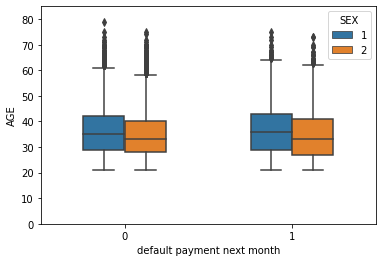

In [19]:
#Create a boxplot for the summary statistics for the categorical variables based on AGE
age_bplt = sns.boxplot(x="default payment next month",y="AGE",hue="SEX",data=bank_db_df,
                      width=.5,)
age_bplt.set_ylim([0,85]) #set the y-axis range

(0.0, 900000.0)

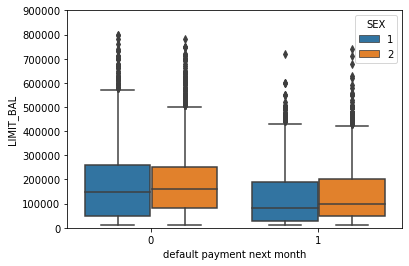

In [20]:
#Create a boxplot for the summary statistics for the categorical variables based on Limit Balance
LIMBAL_bplt = sns.boxplot(x="default payment next month",y="LIMIT_BAL",hue="SEX",data=bank_db_df,
                      width=.80)
LIMBAL_bplt.set_ylim([0,900000])#set the y-axis range

# Visualize Attributes

<AxesSubplot:xlabel='AGE', ylabel='EDUCATION'>

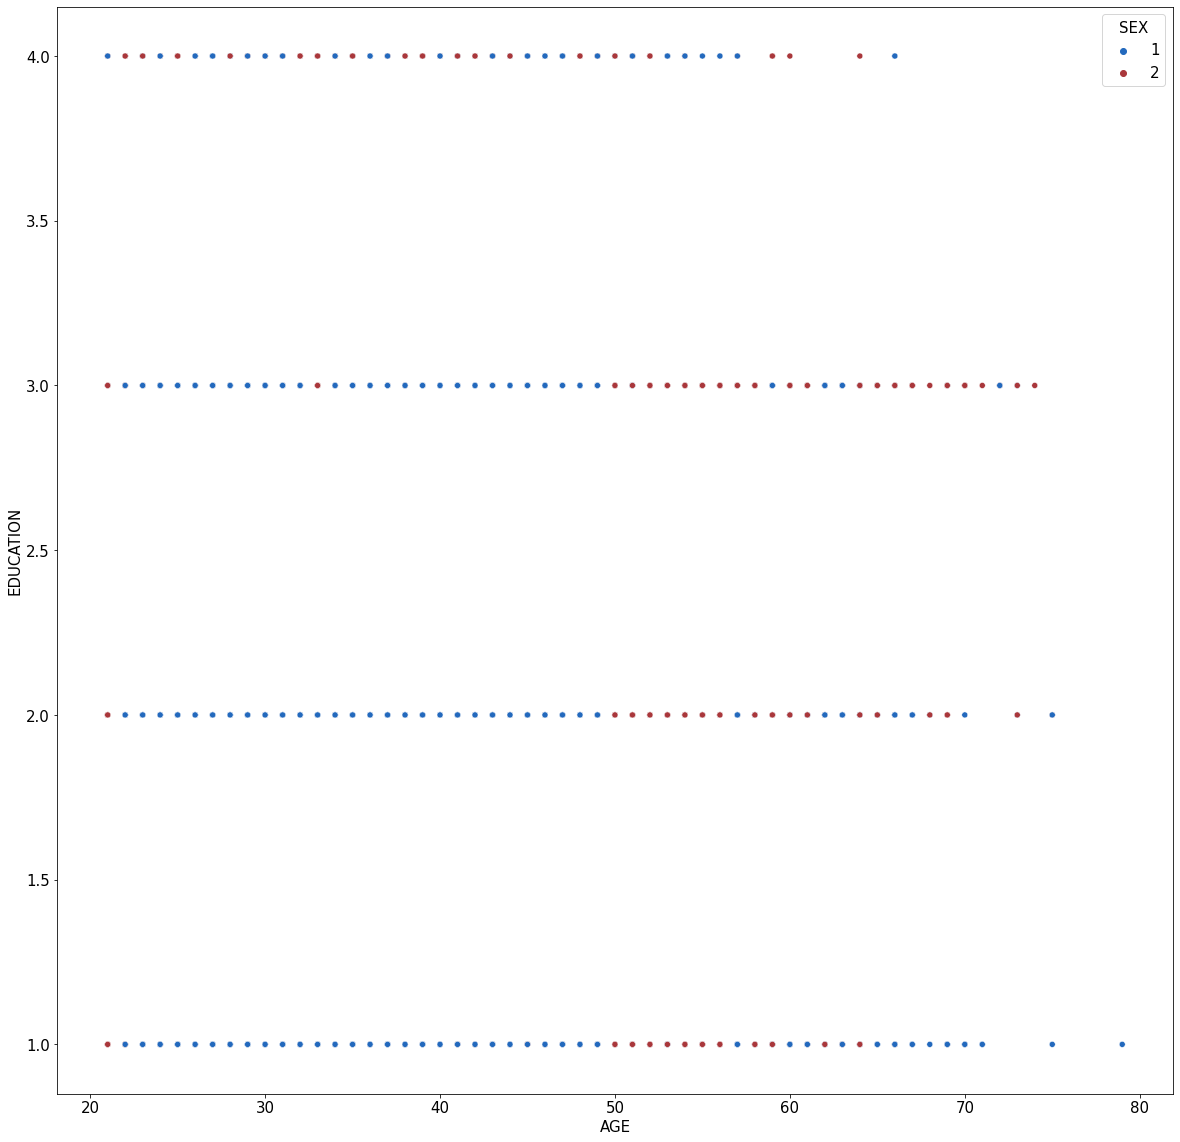

In [88]:
df_sub_comp1 = bank_db_df[["AGE","SEX","EDUCATION"]]
sns.scatterplot(data=df_sub_comp1, x="AGE", y="EDUCATION", hue="SEX", palette='vlag')

<AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>

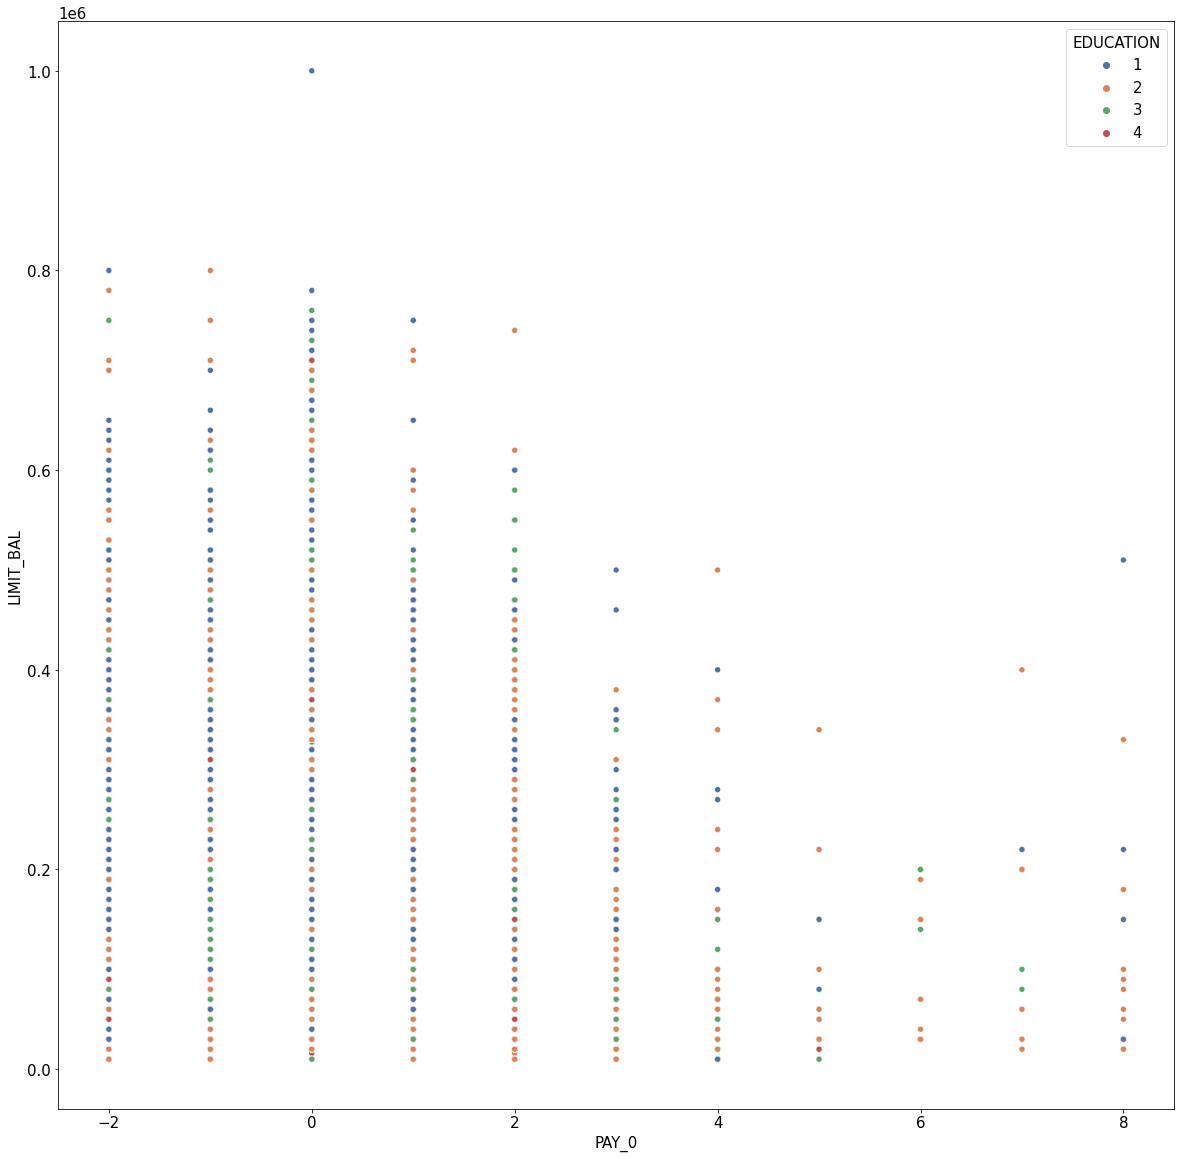

In [92]:
df_sub_comp2 = bank_db_df[["LIMIT_BAL","PAY_0","EDUCATION"]]
sns.scatterplot(data=df_sub_comp2, x="PAY_0", y="LIMIT_BAL", hue="EDUCATION", palette='deep')

<AxesSubplot:xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>

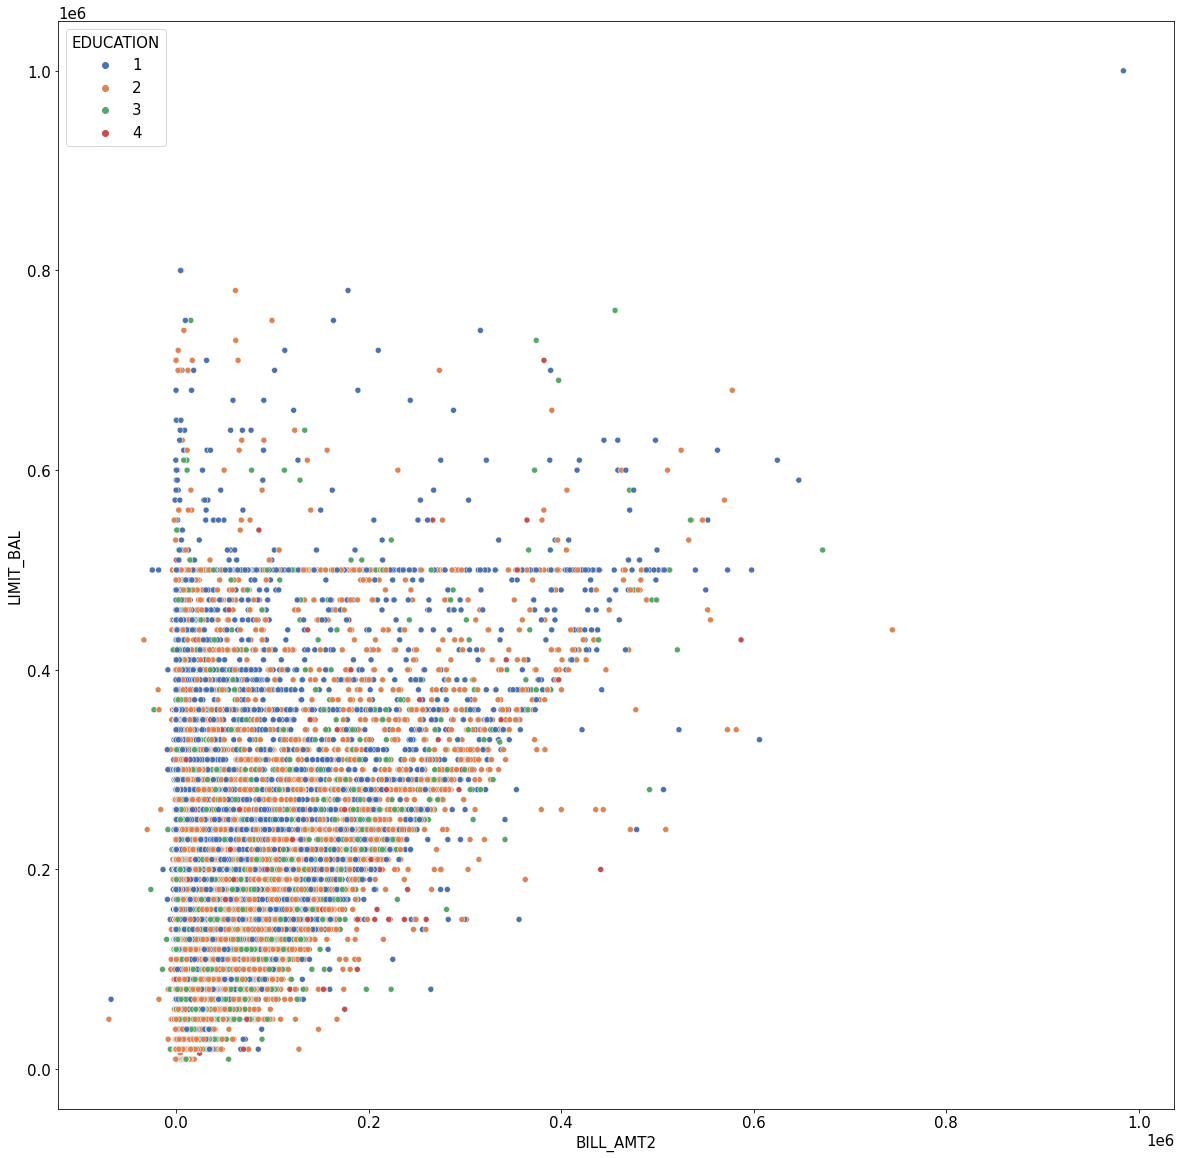

In [93]:
df_sub_comp3 = bank_db_df[["LIMIT_BAL","BILL_AMT2","EDUCATION"]]
sns.scatterplot(data=df_sub_comp3, x="BILL_AMT2", y="LIMIT_BAL", hue="EDUCATION",palette='deep')

# Explore Joint Attributes

Utilizing a correlation plot we first identified attributes that showed strong relationships to those that defaulted. This was the highest for the history of past payments which recorded data on payment delays before defaulting. Payment delay data specifically at the earlier time frames showed the highest correlation to default data.

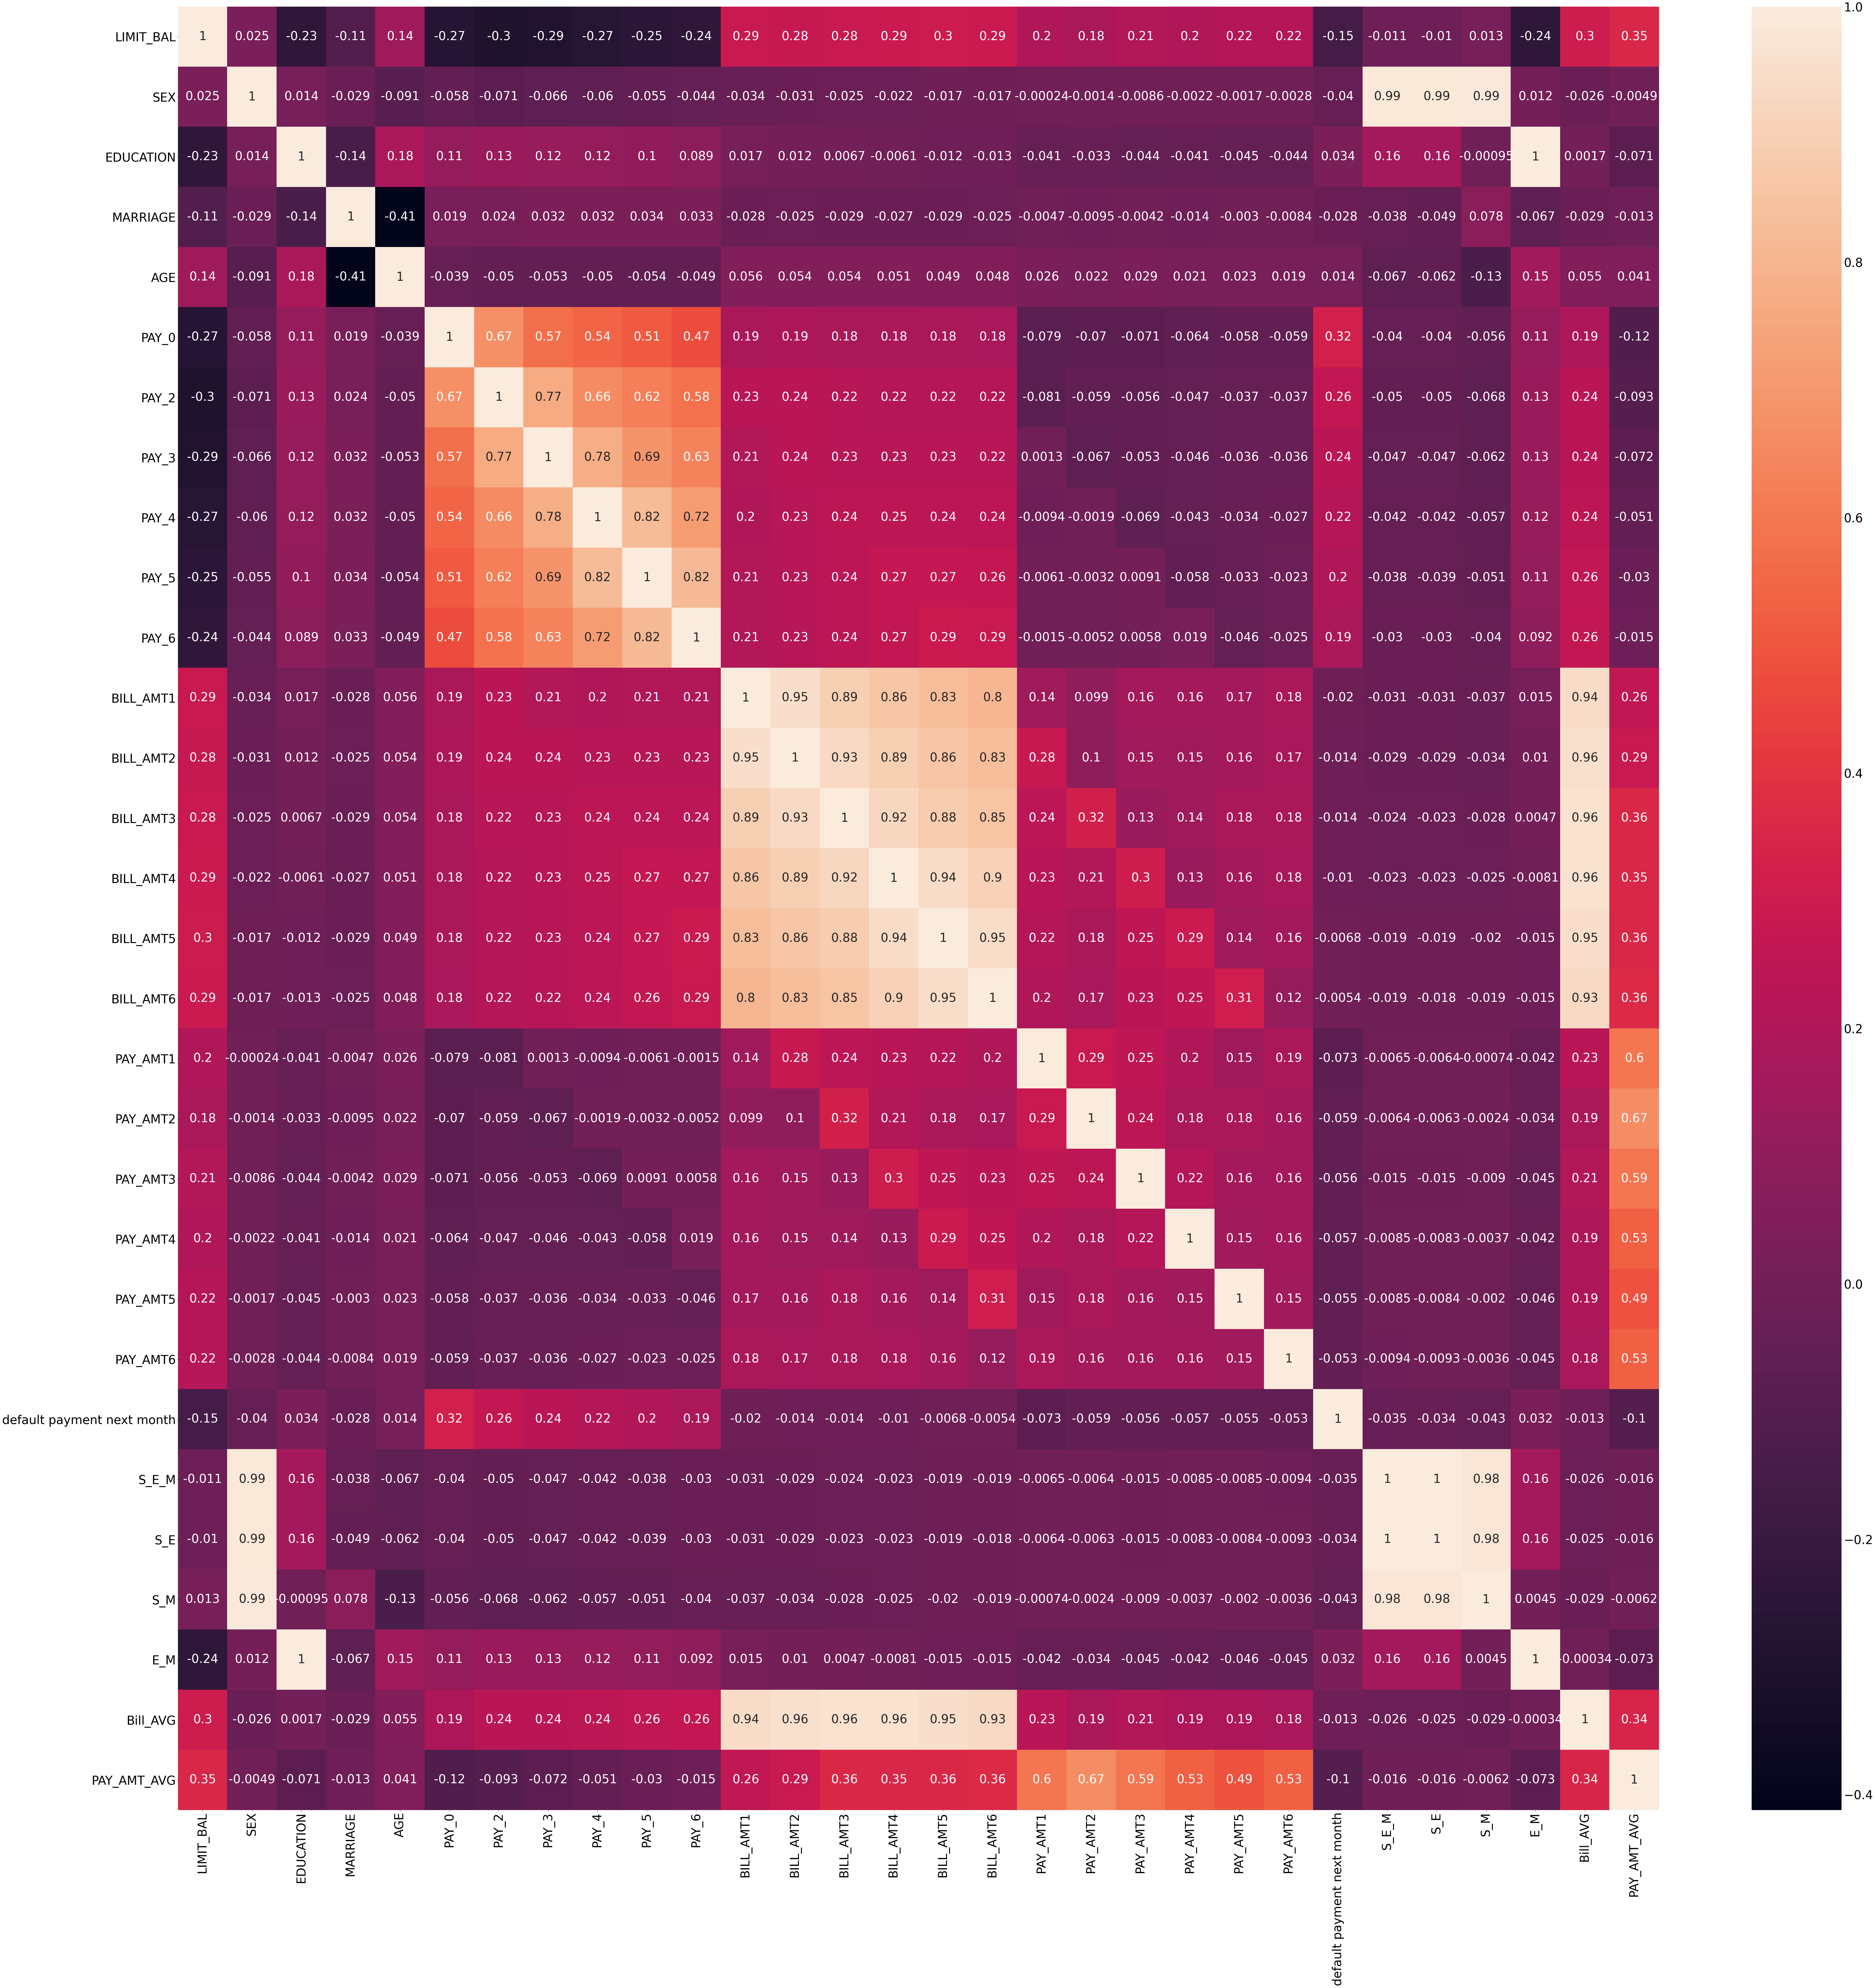

In [53]:
corrMatrix = bank_db_df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams["figure.figsize"] = (110,110)
plt.savefig('CorrMatrix.png')

Graph showing correlation matix. When reviewing the graph we identified that only Pay 0 through Pay 6 had a high correlation to the variable of intrest of default payment next month.

# Explore Attributes and Class

In [46]:
#Created Subsets based on Correlation Matrix 
df_sub_PAY = bank_db_df2[["default payment next month","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] #splitting attributes based on high correlation
df_sub_BILL = bank_db_df2[["default payment next month","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]

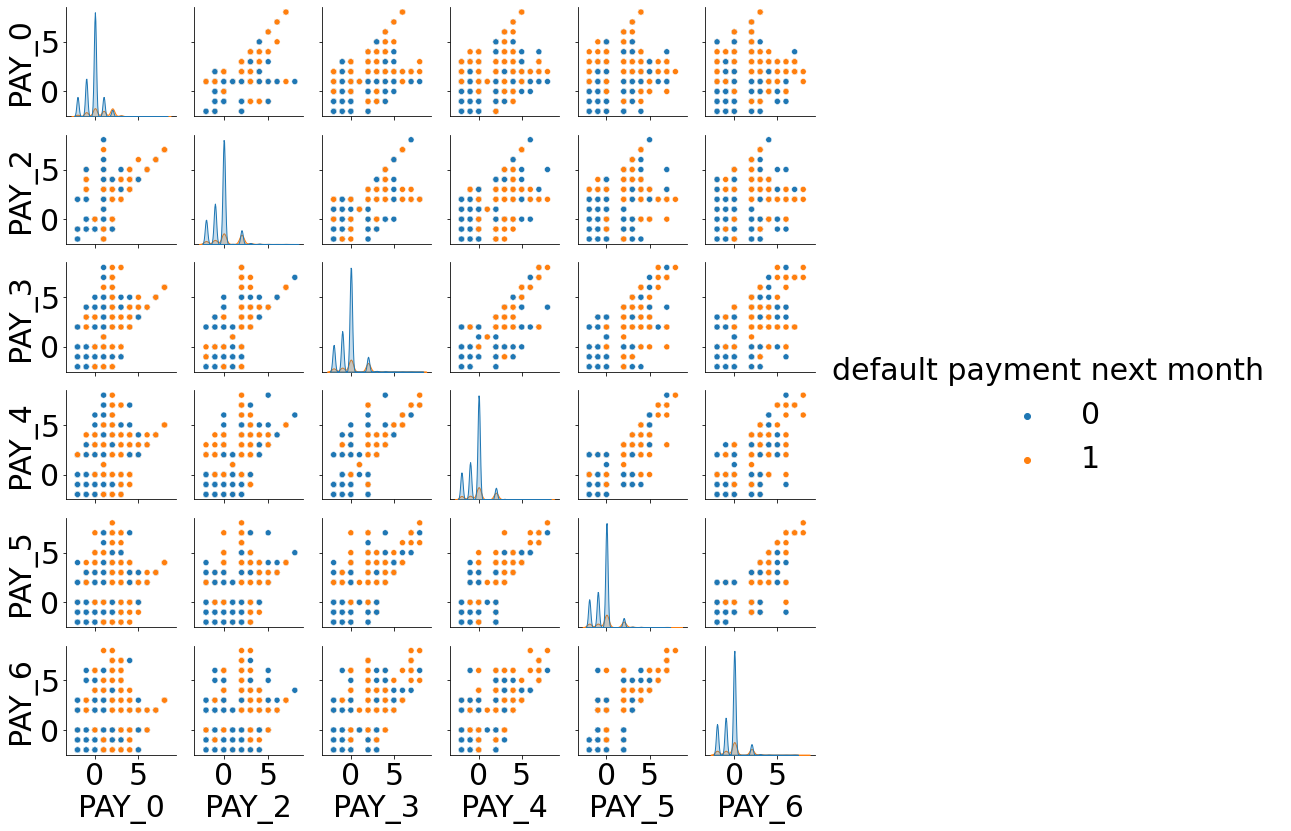

In [54]:
# Scatter Plots of the Pay Attributes
sns.pairplot(df_sub_PAY, hue="default payment next month", height=2)
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (20,20)

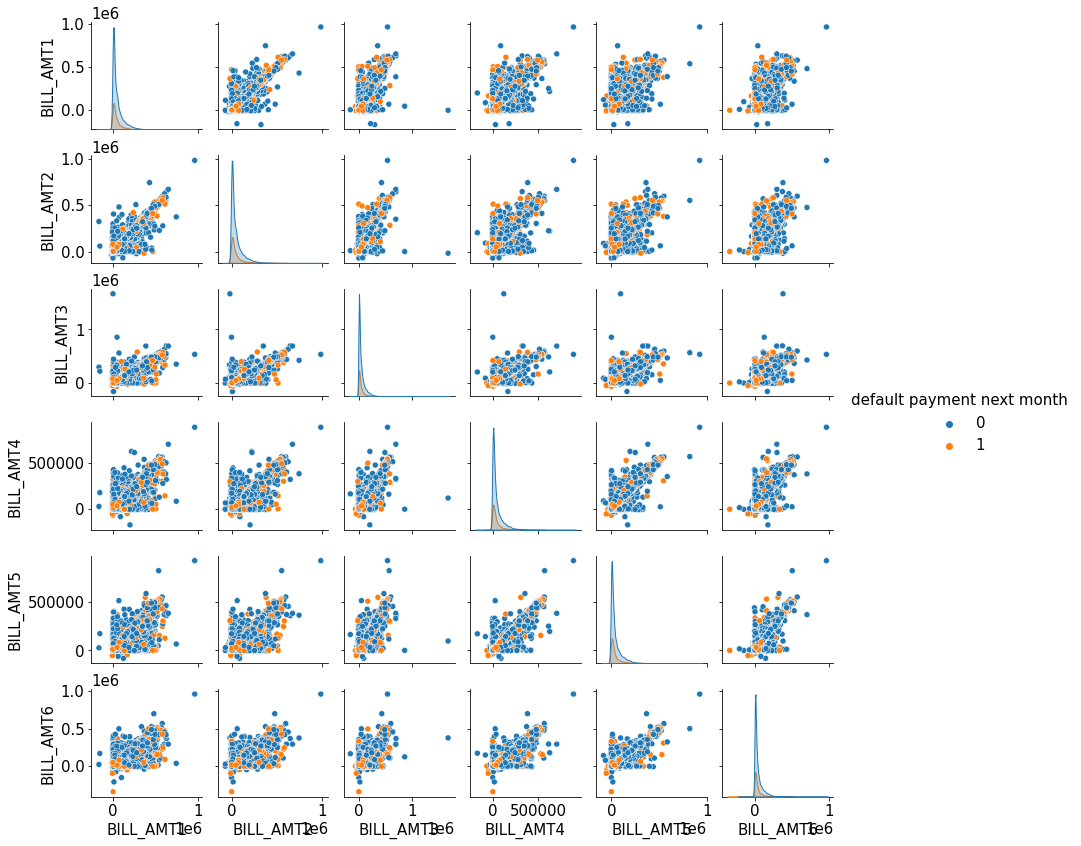

In [55]:
#Scatter Plots of the Bill Attributes 
sns.pairplot(df_sub_BILL, hue="default payment next month", height=2)

<span style='background:yellow'> 
Pair scatter plots were used to determine significant grouping in relation to those accounts that defaulted as seen above for Past Payments and Bill Amounts respectively. Comparatively the grouping of those that defaulted is much clearer for the attributes that were at a higher default correlation (Pay Attributes) than those that were lesser correlated (Bill Amounts). Also of note was that grouping patterns fluctuated between comparisons of pay attributes indicating those that may work as better predictors.
</span>

<ipython-input-58-bd3145546e1d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,12))


<Figure size 864x864 with 0 Axes>

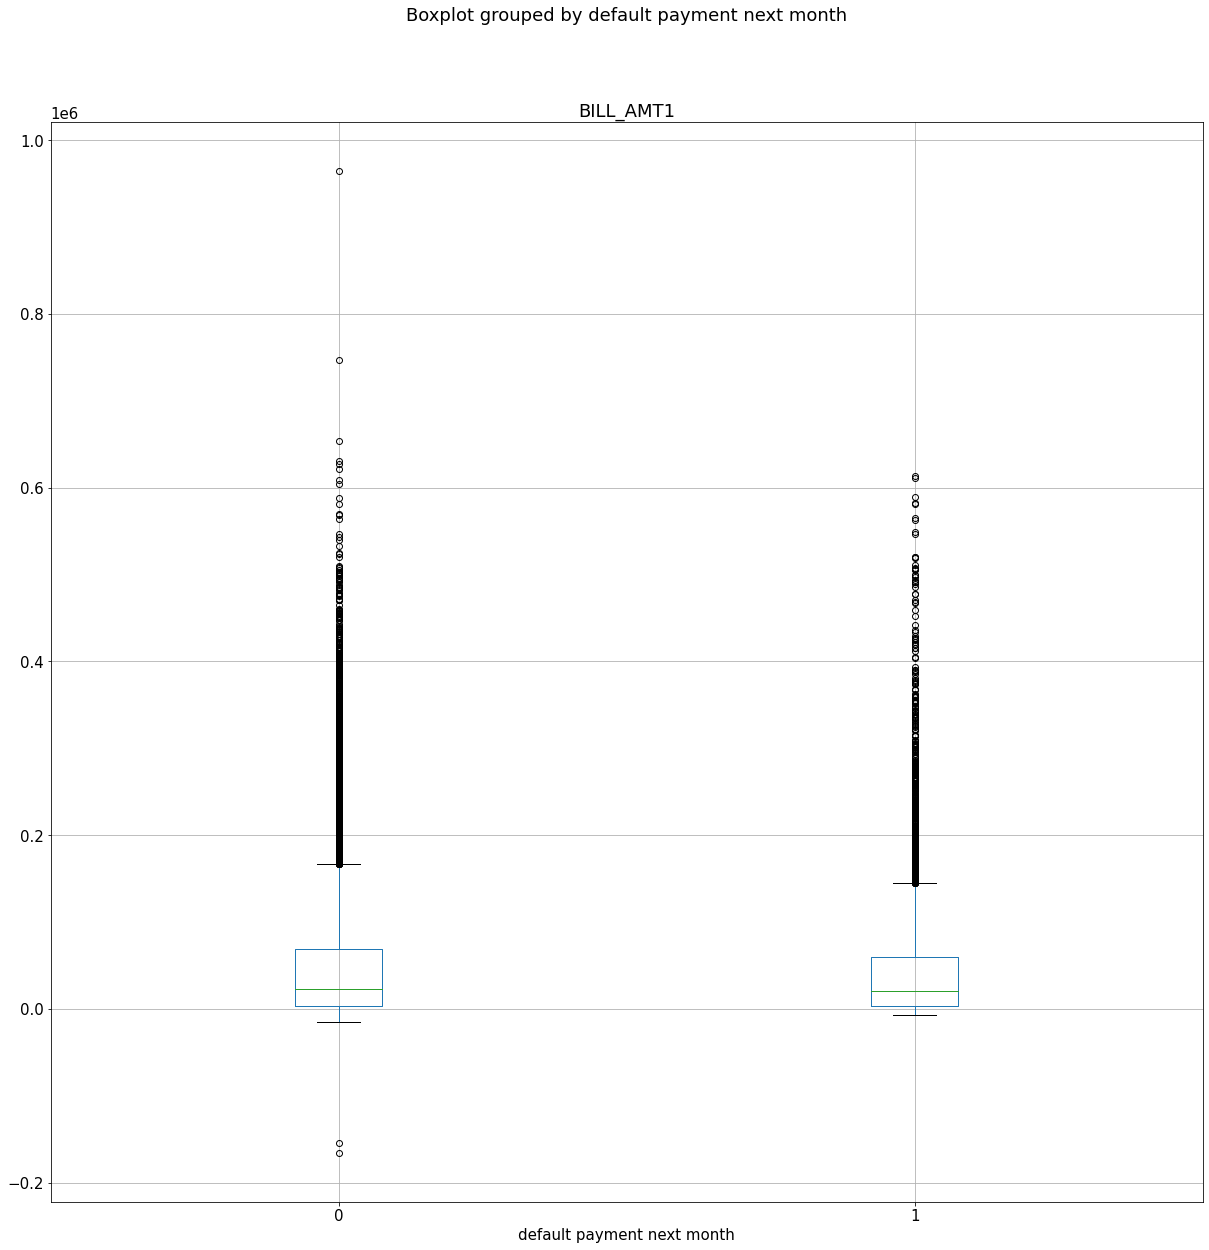

<Figure size 864x864 with 0 Axes>

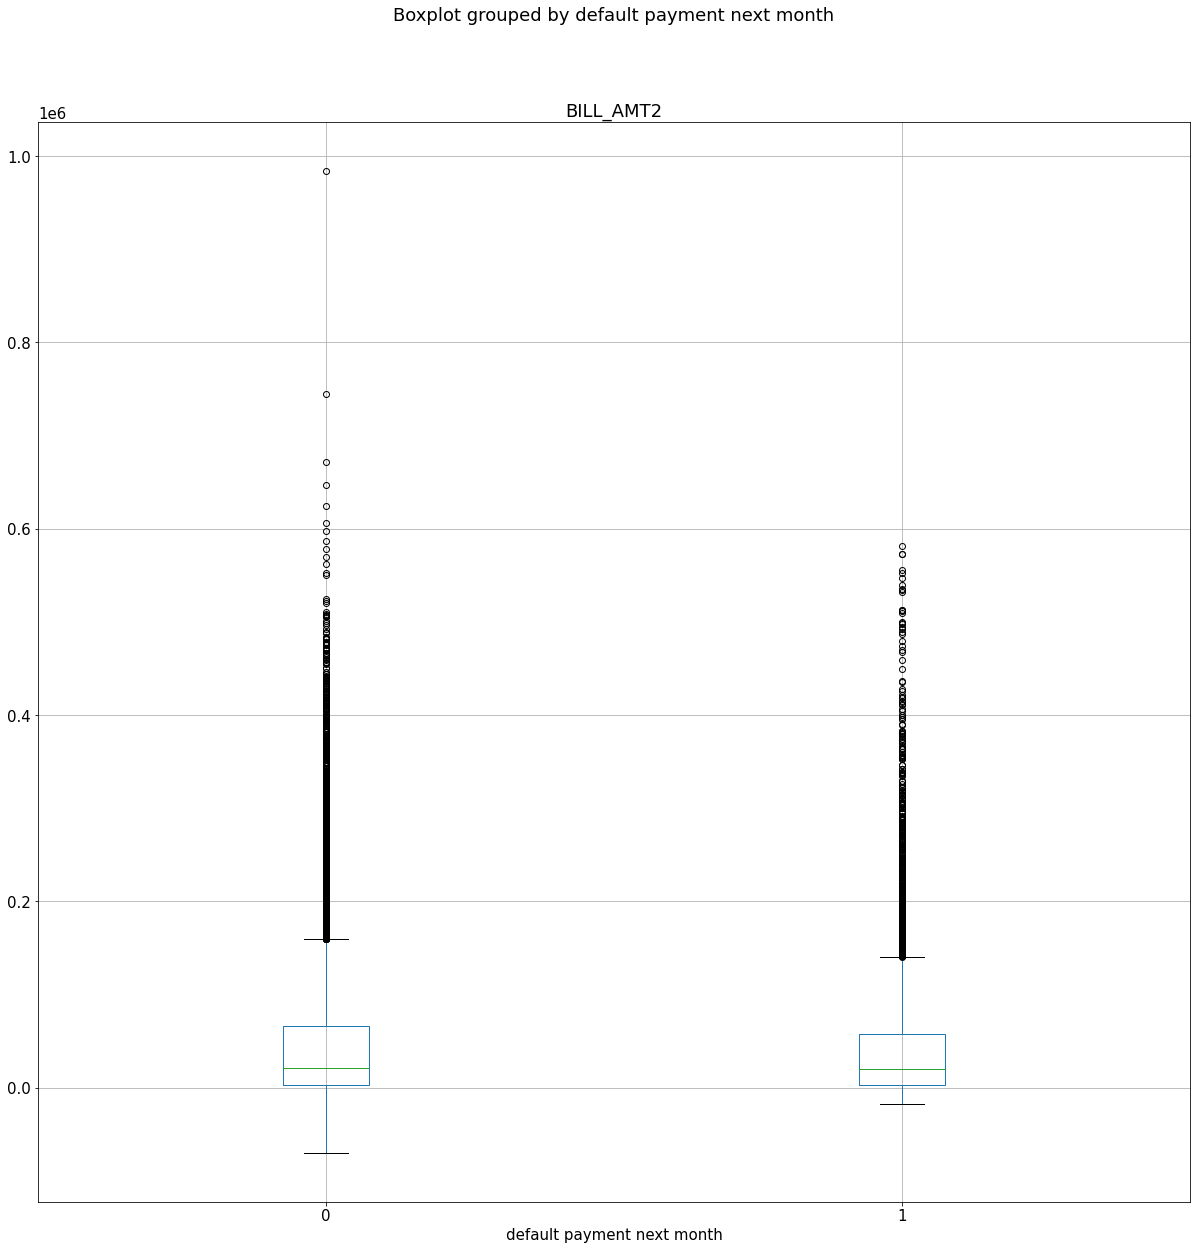

<Figure size 864x864 with 0 Axes>

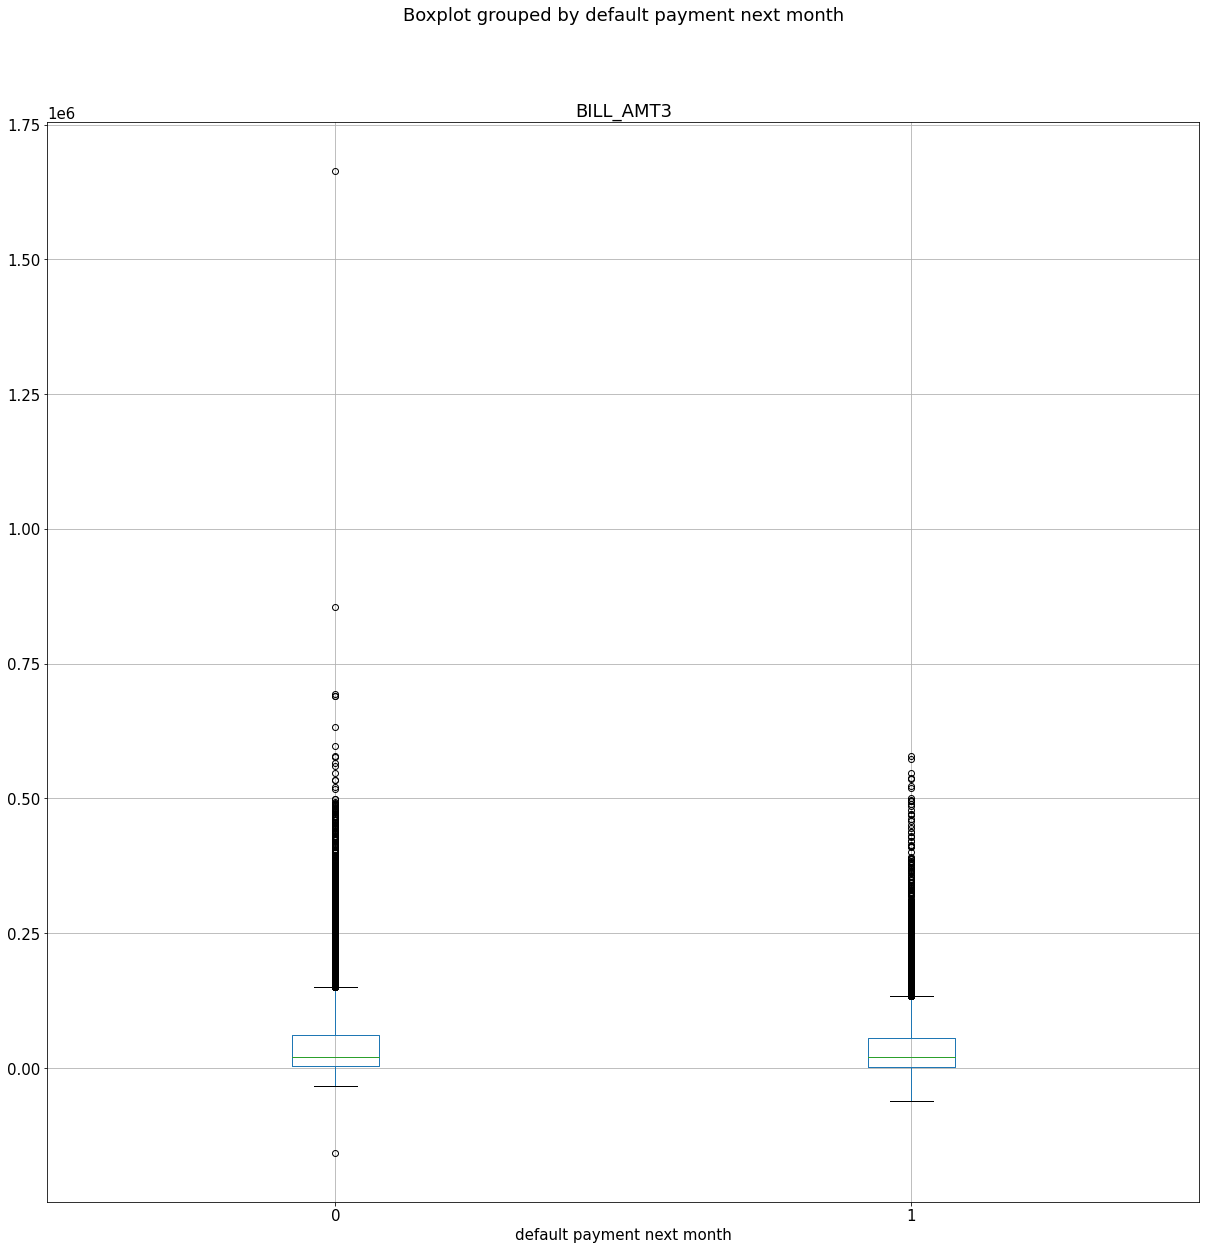

<Figure size 864x864 with 0 Axes>

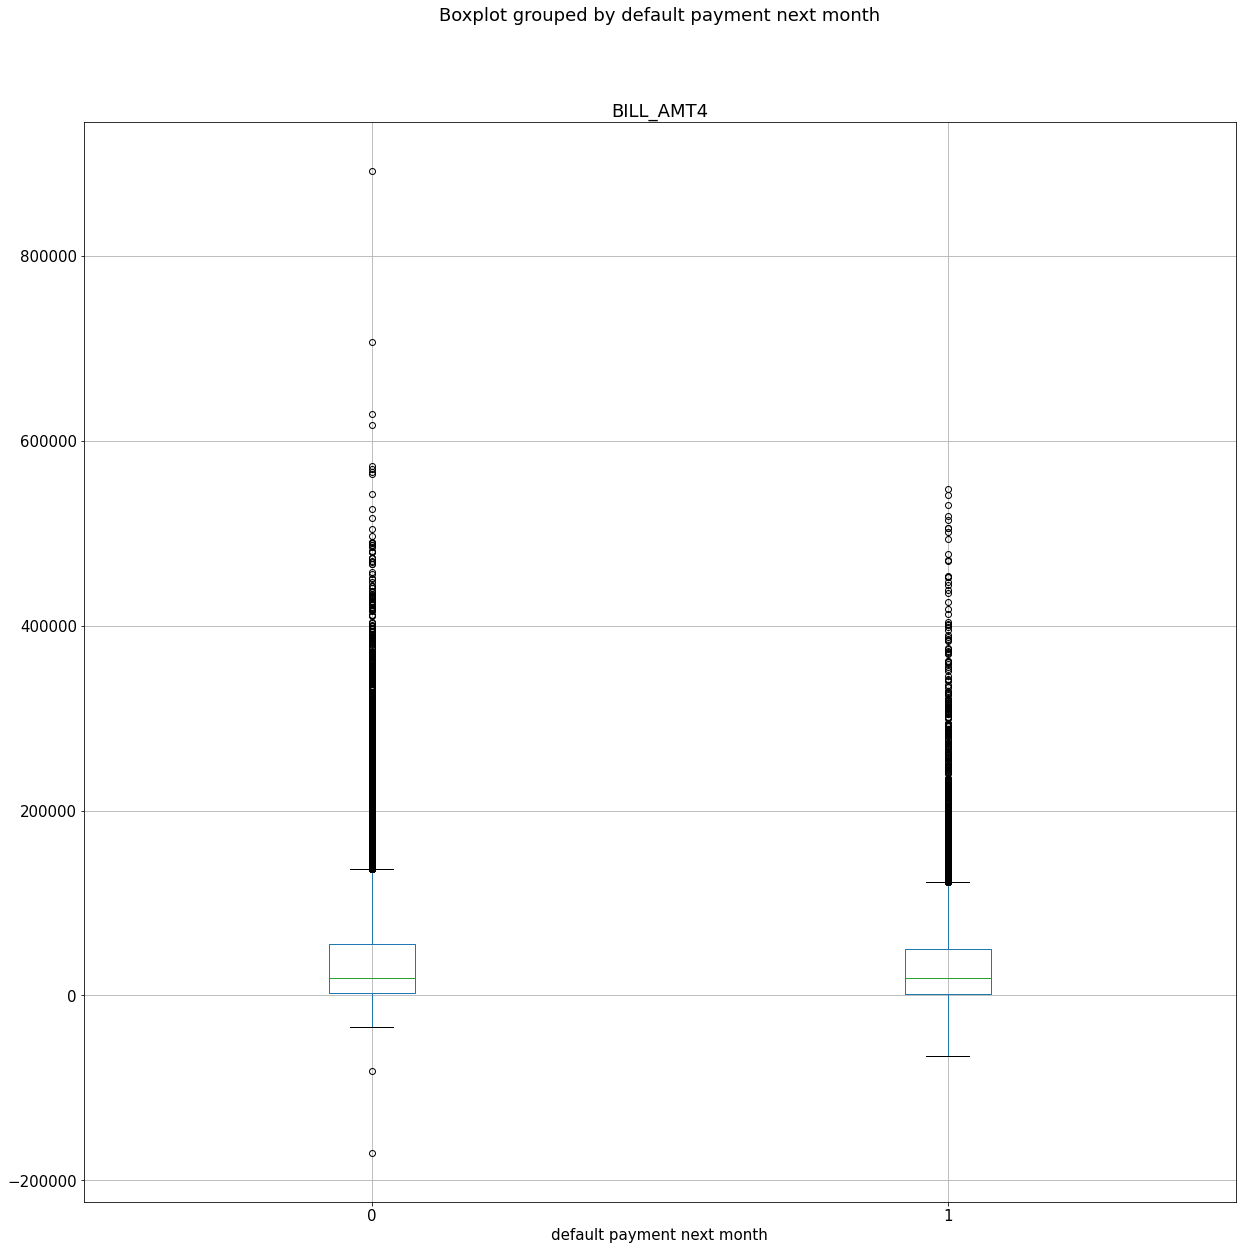

<Figure size 864x864 with 0 Axes>

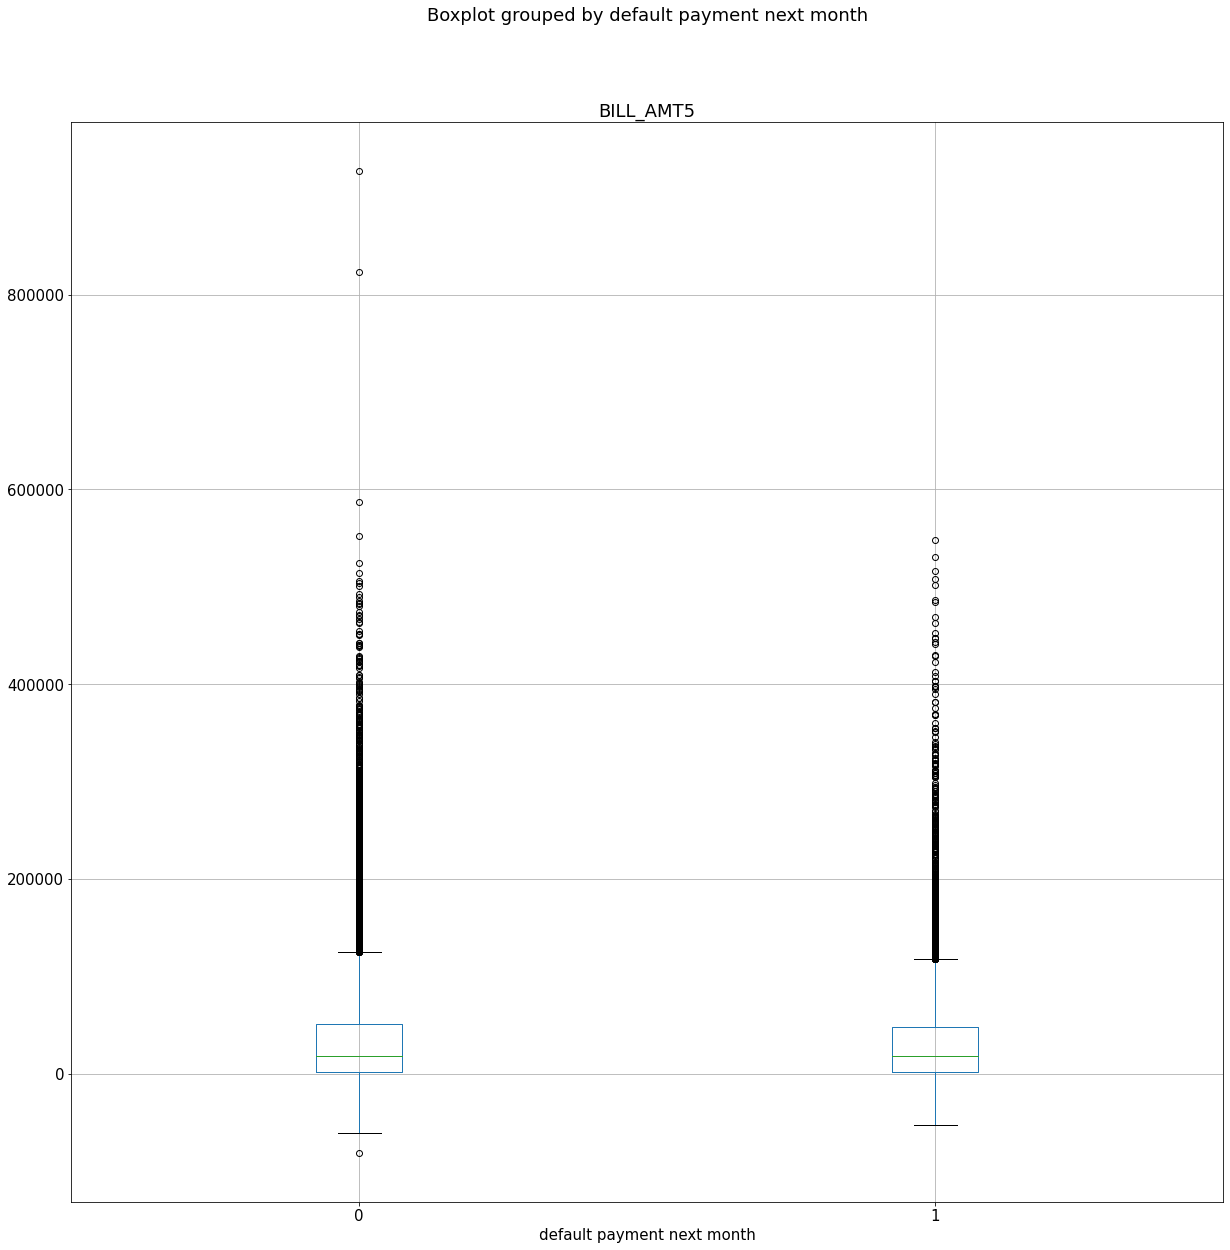

<Figure size 864x864 with 0 Axes>

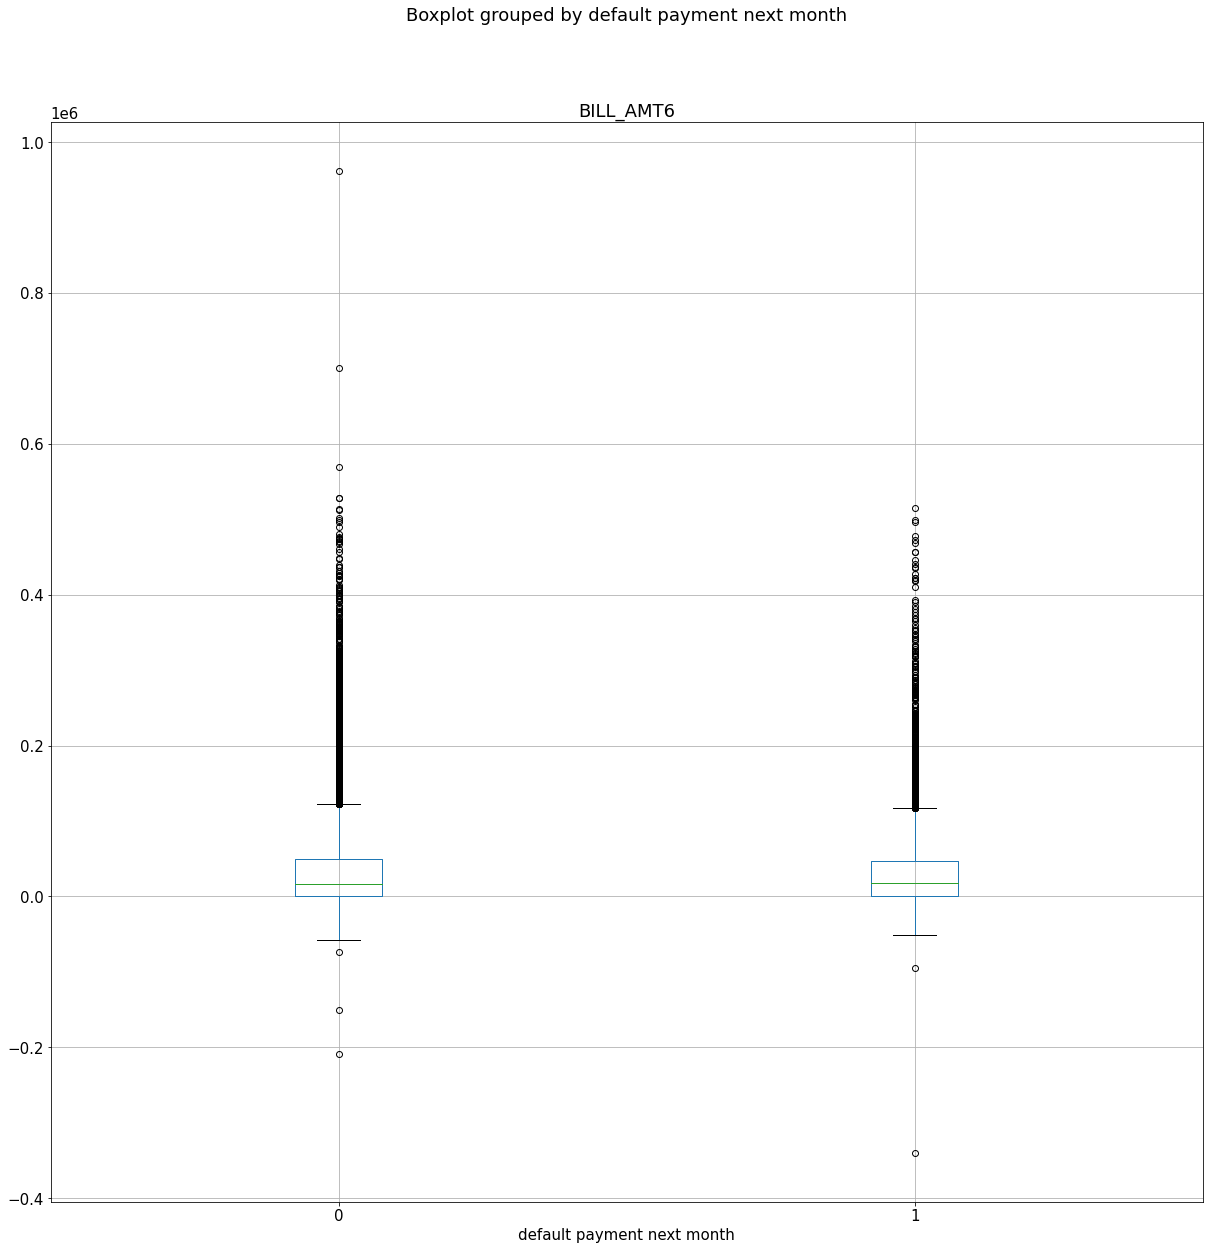

<Figure size 864x864 with 0 Axes>

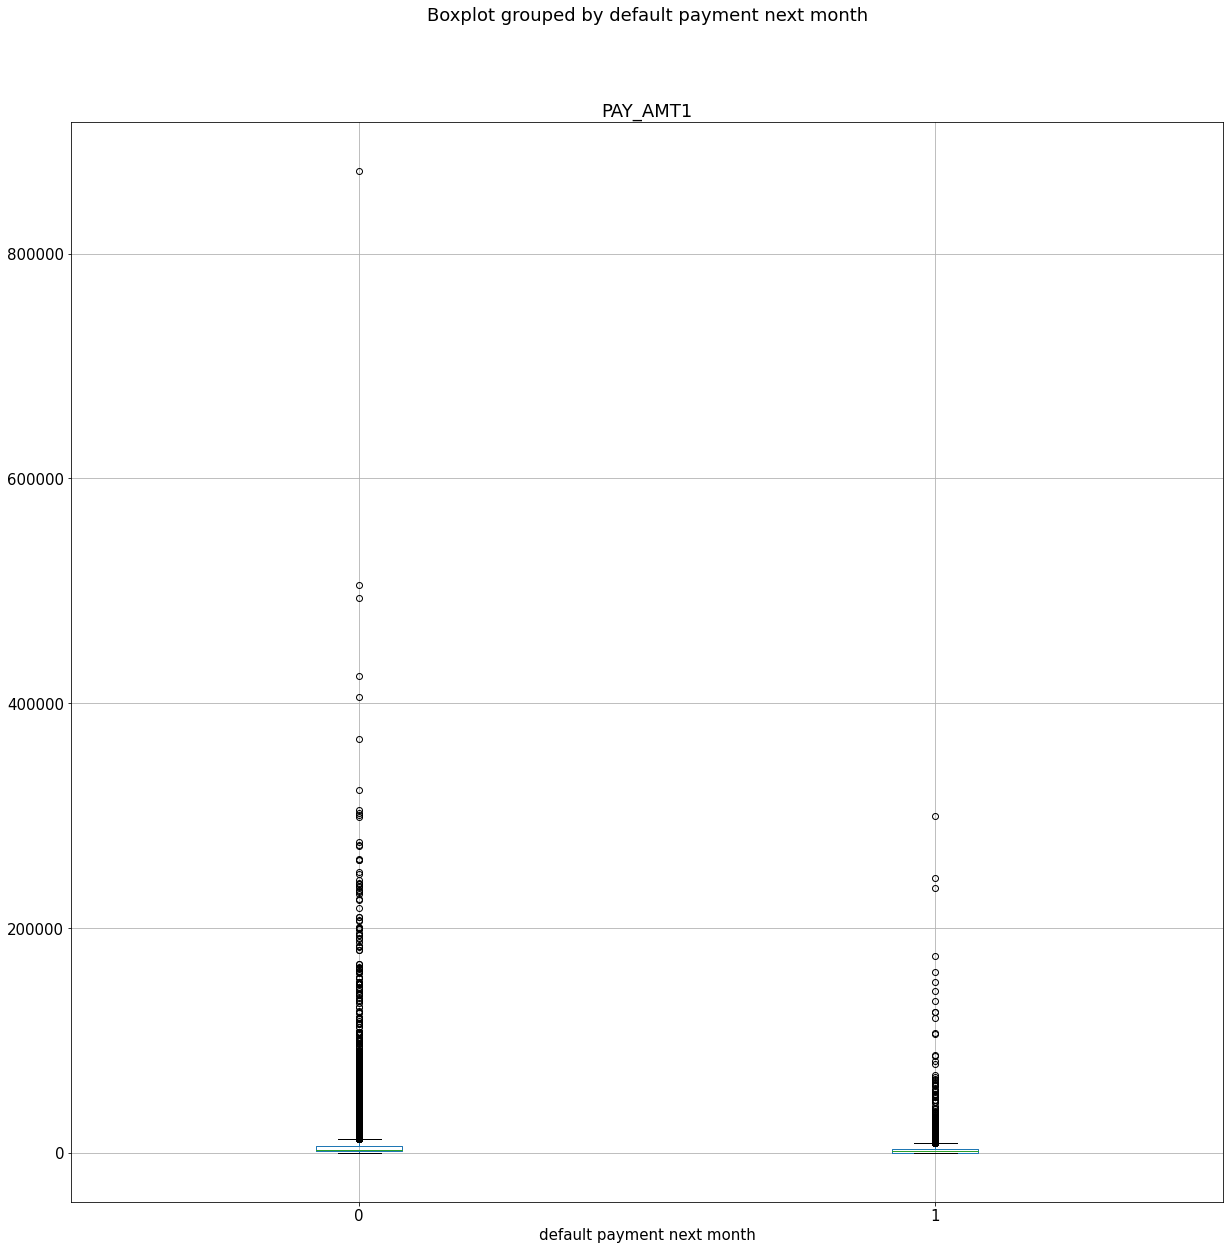

<Figure size 864x864 with 0 Axes>

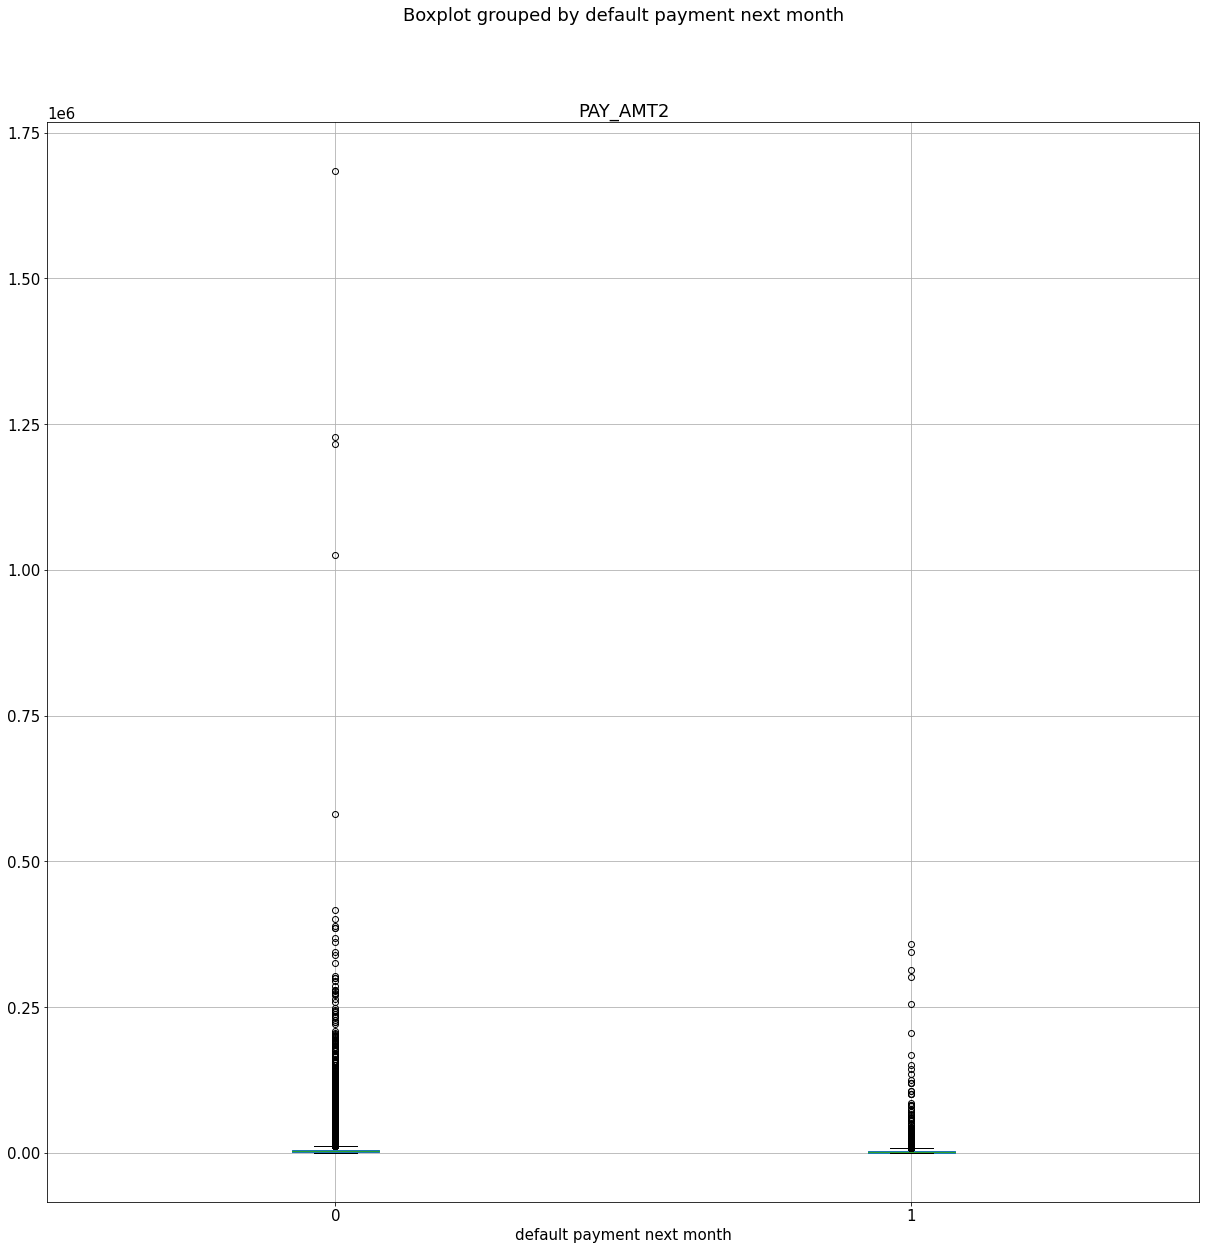

<Figure size 864x864 with 0 Axes>

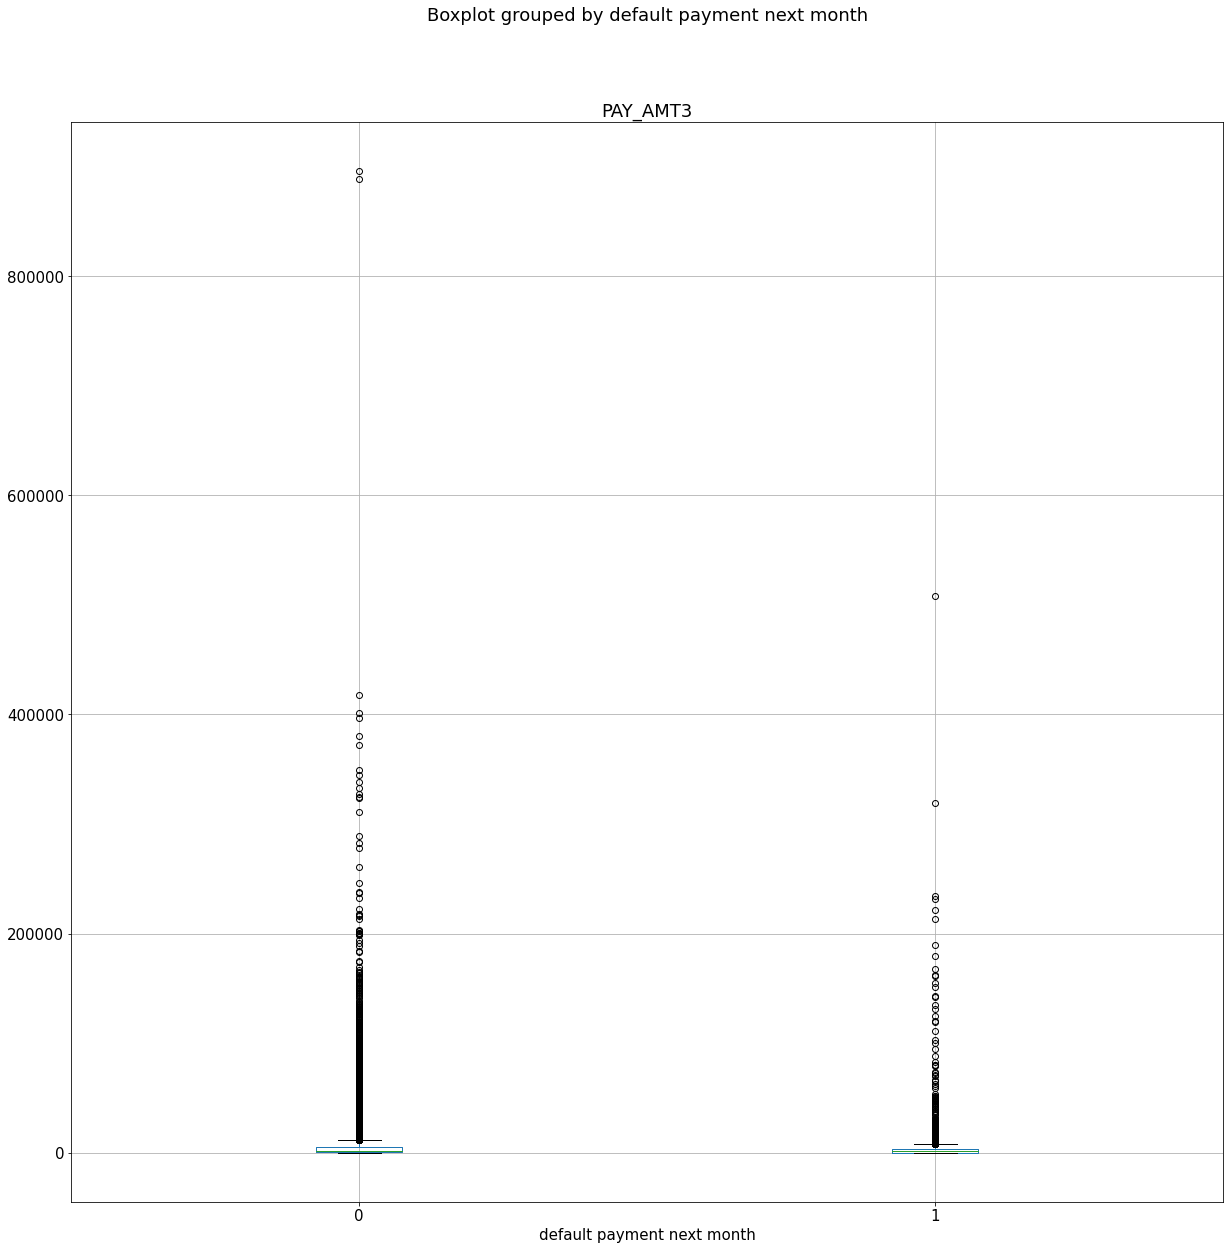

<Figure size 864x864 with 0 Axes>

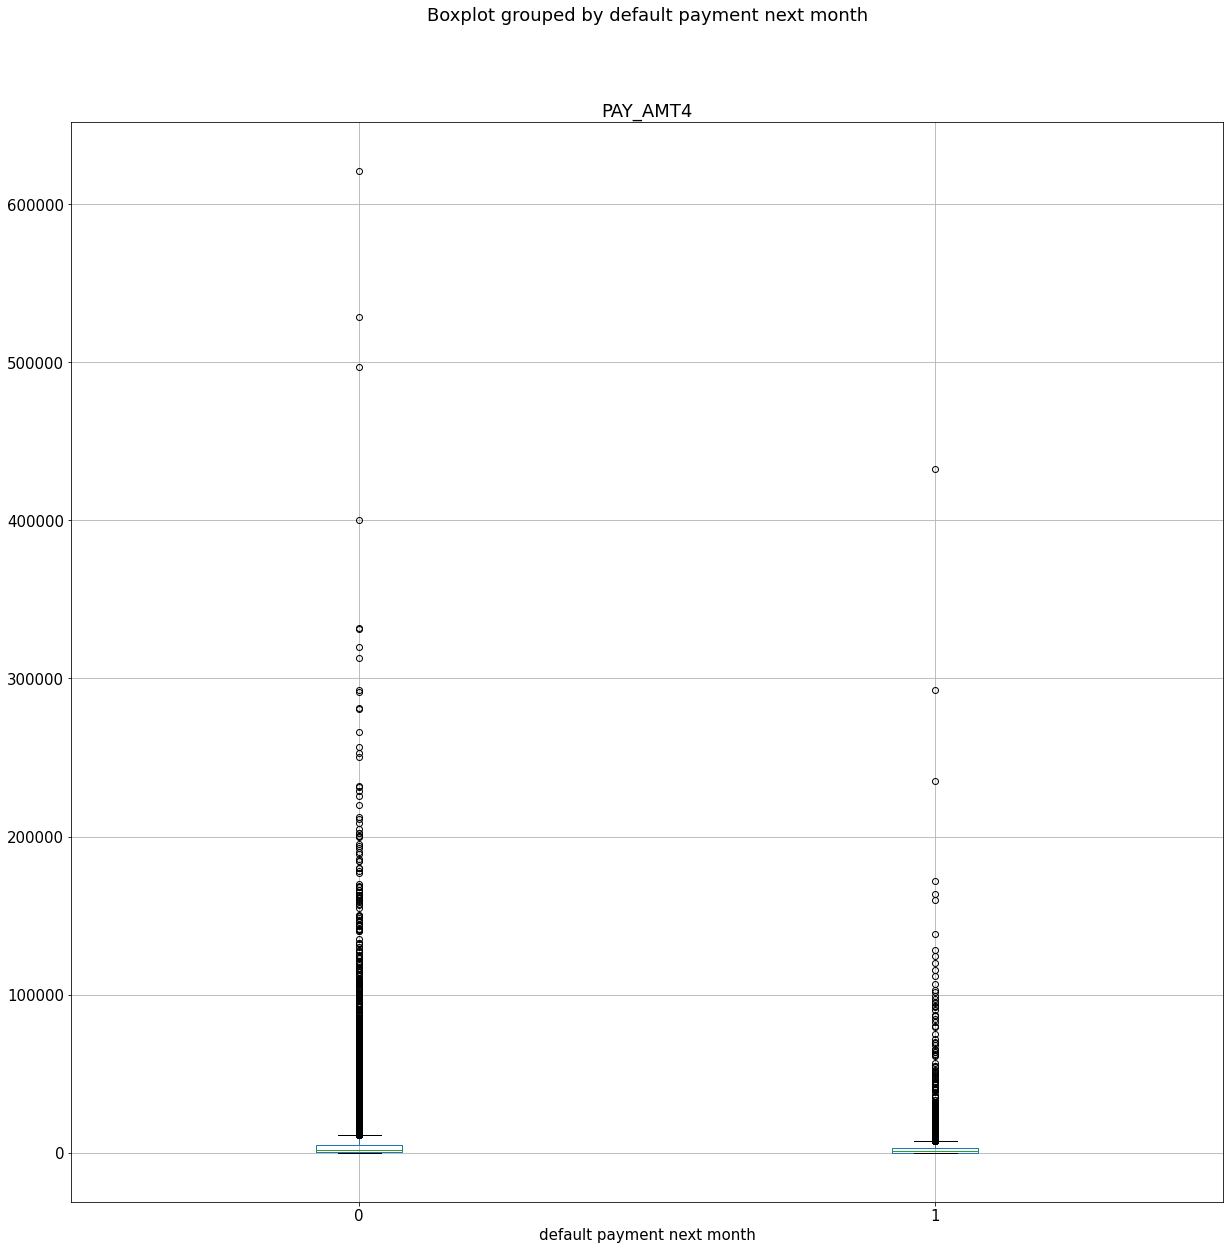

<Figure size 864x864 with 0 Axes>

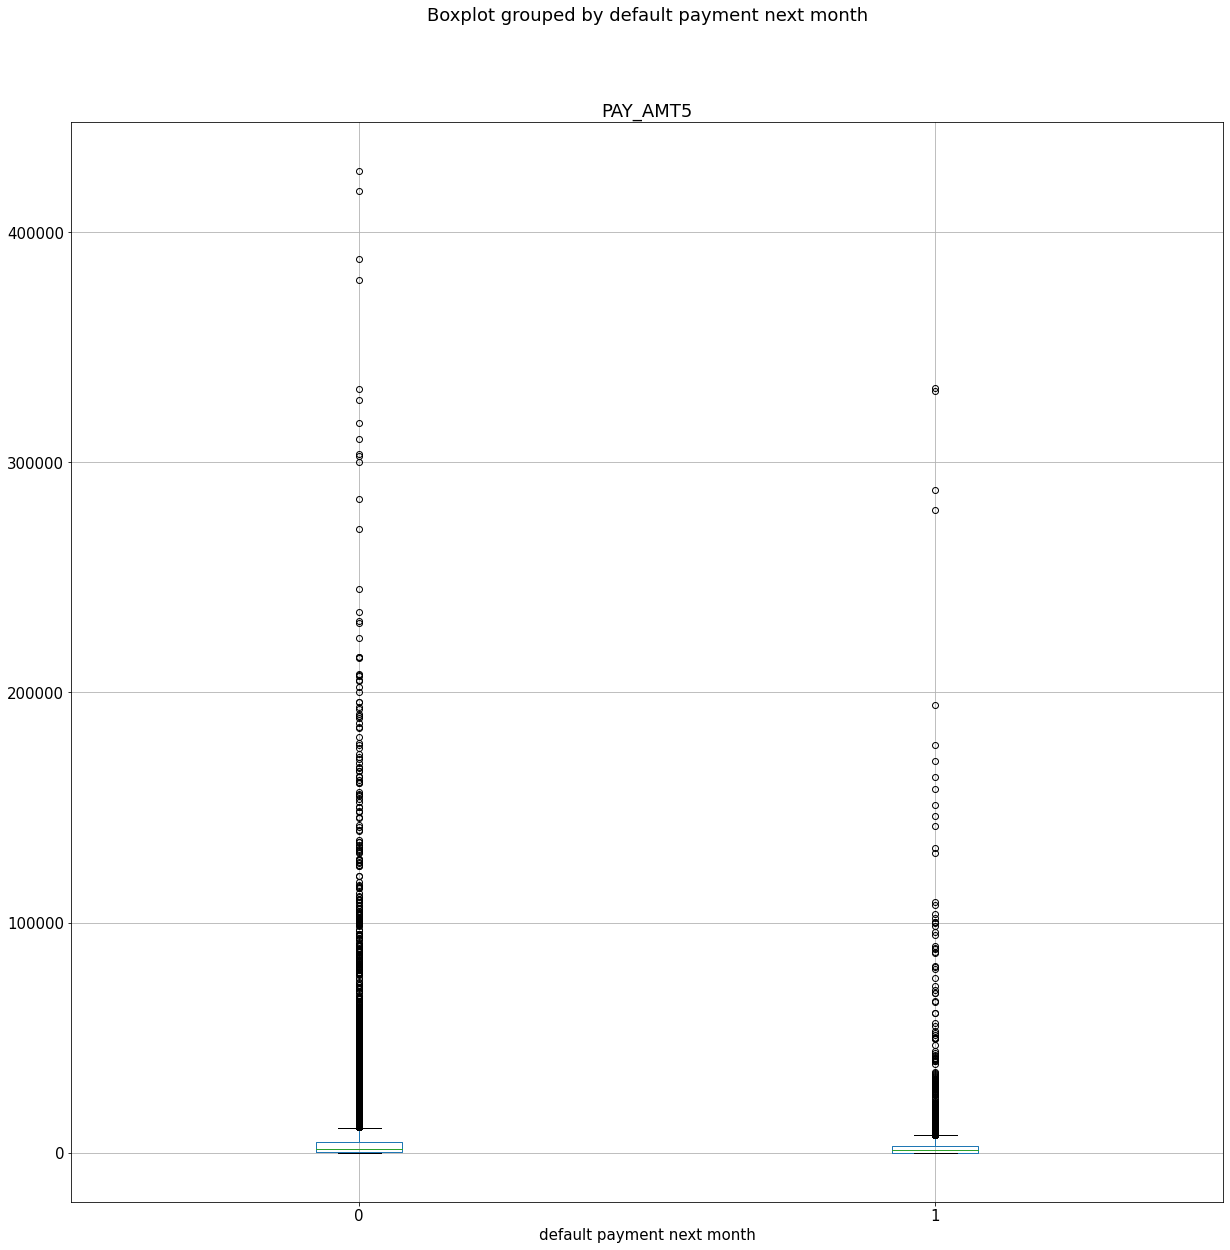

<Figure size 864x864 with 0 Axes>

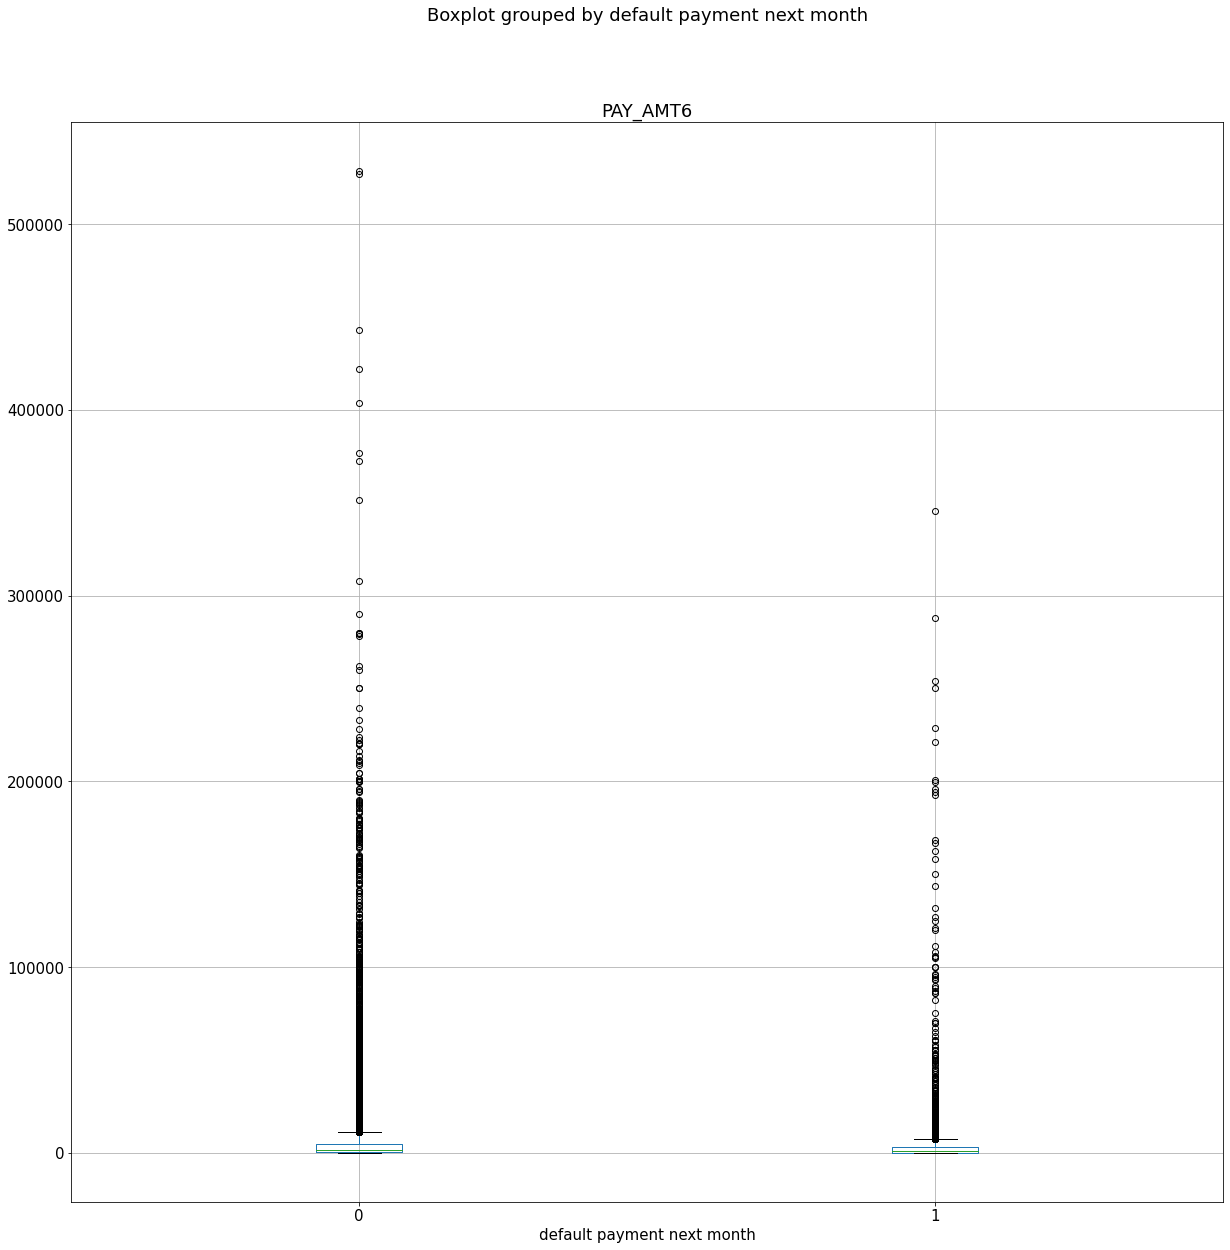

In [58]:
vars_to_plot_separate = [['BILL_AMT1'],['BILL_AMT2'],['BILL_AMT3'],['BILL_AMT4'],
                         ['BILL_AMT5'],['BILL_AMT6'],['PAY_AMT1'],['PAY_AMT2'],
                         ['PAY_AMT3'],['PAY_AMT4'],['PAY_AMT5'],['PAY_AMT6']]
for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(12,12))
    ax = bank_db_df2.boxplot(column=plot_vars,by='default payment next month')
plt.show()

# Explore Attributes and Class

The does appear to be heavy skewness towards old customers and higher limit balances for both sexes. The median Age, Education, and Marriage status are the same for the total group and the filtered dataset with just defaulted accounts. When grouping by SEX, the average for males appear to be higher(see boxplot above) than the average female no matter the default status.

However, the median limit balance of 140,000 is higher than the 90,000 median limit balance for the defaulted group. Contrary to the average age between the two sex, the average limit balance for females is higher than males no matter the default status.

In [97]:
from sklearn.preprocessing import StandardScaler
features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
            'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# Separating out the features
x = bank_db_df2.loc[:, features].values
# Separating out the target
y = bank_db_df2.loc[:,['default payment next month']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Utilized code from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                         'principal component 3','principal component 4',
                         'principal component 5','principal component 6',
                         'principal component 7','principal component 8',
                         'principal component 9'])
pca.explained_variance_ratio_

### Utilized code from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

array([0.36180187, 0.20618472, 0.08362378, 0.05085274, 0.04933822,
       0.04845462, 0.04349448, 0.04070514, 0.03800722])

In [99]:
finalDf = pd.concat([principalDf, bank_db_df2[['default payment next month']]], axis = 1)

In [100]:
finalDf.head()

principal component 1  principal component 2  principal component 3  principal component 4  principal component 5  principal component 6  principal component 7  principal component 8  principal component 9  default payment next month
0              -1.774457              -0.613834              -0.633142              -0.474713              -0.033614              -0.077654              -0.051448               0.232366               3.055349                           1
1              -0.660334              -2.051521               0.426726               0.113607               0.148504              -0.100264               0.071387               0.134269              -0.852330                           1
2              -0.766104              -0.934008               0.023527              -0.003720              -0.099812              -0.113338               0.035160               0.062651              -0.217292                           0
3              -0.114276              -0.627801              -0.289996               0.133394              -0.044445               0.052357              -0.044003               0.025403              -0.192321                           0
4              -0.851808               0.029702               0.965619               0.731632               0.121898               0.497529              -0.258582               1.065251              -0.624595                           0

In [104]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   principal component 1       30000 non-null  float64
 1   principal component 2       30000 non-null  float64
 2   principal component 3       30000 non-null  float64
 3   principal component 4       30000 non-null  float64
 4   principal component 5       30000 non-null  float64
 5   principal component 6       30000 non-null  float64
 6   principal component 7       30000 non-null  float64
 7   principal component 8       30000 non-null  float64
 8   principal component 9       30000 non-null  float64
 9   default payment next month  30000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


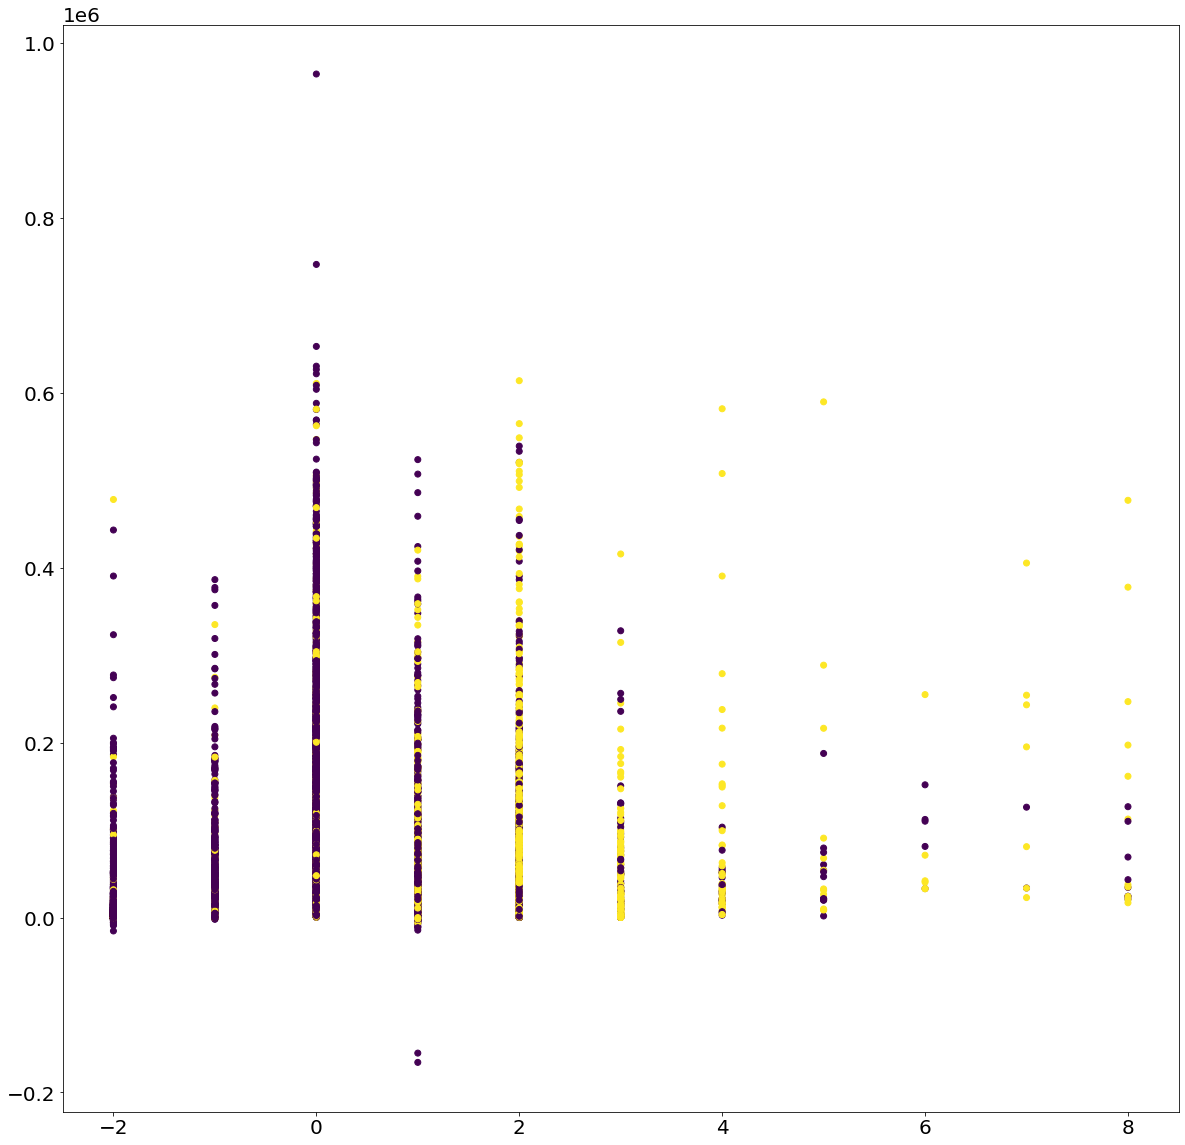

In [42]:
# Looking at the diffrencee of Pay 0 and Bill Amount 1
plt.scatter(bank_db_df2['PAY_0'],bank_db_df2['BILL_AMT1'],c=bank_db_df2['default payment next month'],label=bank_db_df2['default payment next month'])

<AxesSubplot:xlabel='PAY_6', ylabel='PAY_5'>

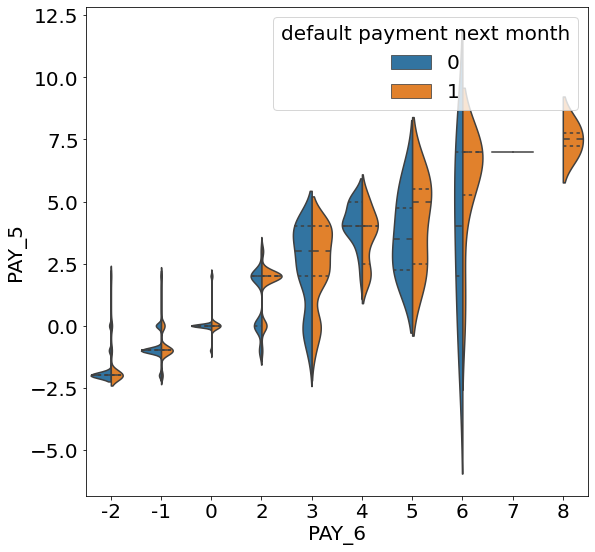

In [31]:
# Violin Plot of Pay 6 and Pay 5

f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="PAY_6", y="PAY_5", hue="default payment next month", data=bank_db_df2, 
               split=True, inner="quart")

<AxesSubplot:xlabel='PAY_0', ylabel='PAY_2'>

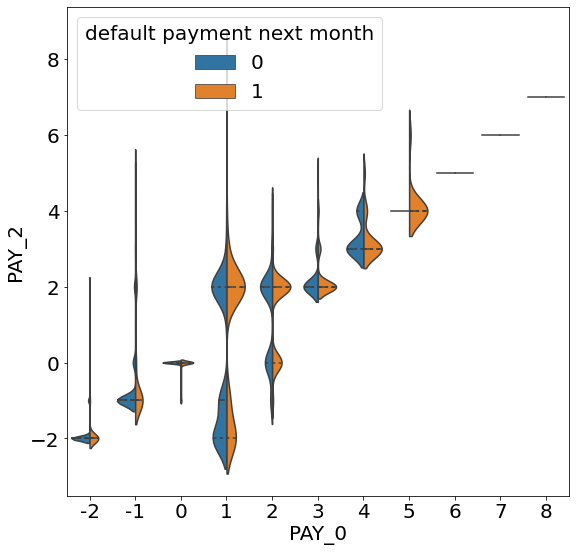

In [32]:
# Violin Plot of Pay 0 and Pay 2

f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="PAY_0", y="PAY_2", hue="default payment next month", data=bank_db_df2, 
               split=True, inner="quart")

<span style='background:yellow'>
Examining the differences in payment history was best viewed in a violin plot comparison. The two plots above clearly indicate an increased likelihood of default for increased payment delays. This makes sense logically as increased delays in payment will most likely lead to a client defaulting. It is also noted that the later the client begins to delay payments also shows increases to the risk of default as the client is likely beginning to struggle making payments after having made several previous payments, this especially increases as the delays are continued specifically at 3 months and beyond.
</span>

# New Features

We created from existing categories based on Gender, Education and Marital Status. These were combined into new groupings listed below:

Gender/Education/Marital Status

Gender/Education

Gender/Marital Status

Education/Marital Status

This is to look if there was more than a binary relationship to defaulted payments being predicted. We tried this approach to see if we could provide more dimensionality to these categorical variables so that we could use them to show a higher correlation to our goal if we can predict default payments each month. In addition based on the correlation Matrix we could did create a new column that would Pay columns which are strongly correlated to one another. This action also was reproduced on the Bill Amount columns as well. This is to try to get a more highly correlated column to default payment next month column which is predicted value.     


# Exceptional Work

We utlized feature creation in this project to further explore the data. This was from combining more catagorical variables together to taking averages of several columns to create new coulmns in our data. This is in a effort to draw better results from the variables that are present. This provided futher insight into the work showing us that the catagorical variables of Gender, Education and Marital Status does have a large impact if someone will defult or not.  

# Conclusion

Through our EDA, we were not able to confidently identify strong predictors in predicting default payment of credit card borrowers.  Therefore, we believe further transformations of the data set is appropriate to identify stronger correlations in order to predict our variable of interest . We will explore  logarithmic changes and create additional interaction variables. Ultimately as the data stands we believe that a random forest model would be the best predictive model.The main reason is due to the low amount of present correlations to our identified target variable of default payment next month.